# Equipo 1 - Fase 1

## Import libraries

In [127]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from google.colab import files

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset from GitHub

In [109]:
df = pd.read_csv('https://raw.githubusercontent.com/Pakohp88/Equipo1_mlops/main/data/raw/turkis_music_emotion_original.csv')

In [110]:
df.head()

Class  _RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
0  relax            0.052            0.591              9.136      130.043   
1  relax            0.125            0.439              6.680      142.240   
2  relax            0.046            0.639             10.578      188.154   
3  relax            0.135            0.603             10.442       65.991   
4  relax            0.066            0.591              9.769       88.890   

   _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  ...  \
0         3.997         0.363         0.887         0.078         0.221  ...   
1         4.058         0.516         0.785         0.397         0.556  ...   
2         2.775         0.903         0.502         0.329         0.287  ...   
3         2.841         1.552         0.612         0.351         0.011  ...   
4         3.217         0.228         0.814         0.096         0.434  ...   

   _Chromagram_Mean_9  _Chromagram_Mean_10  _Chromagram_Mean_11  \
0               0.426                1.000                0.008   
1               0.002                1.000                0.000   
2               0.184                0.746                0.016   
3               0.038                1.000                0.161   
4               0.004                0.404                1.000   

   _Chromagram_Mean_12  _HarmonicChangeDetectionFunction_Mean  \
0                0.101                                  0.316   
1                0.984                                  0.285   
2                1.000                                  0.413   
3                0.757                                  0.422   
4                0.001                                  0.345   

   _HarmonicChangeDetectionFunction_Std  \
0                                 0.261   
1                                 0.211   
2                                 0.299   
3                                 0.265   
4                                 0.261   

   _HarmonicChangeDetectionFunction_Slope  \
0                                   0.018   
1                                  -0.082   
2                                   0.134   
3                                   0.042   
4                                   0.089   

   _HarmonicChangeDetectionFunction_PeriodFreq  \
0                                        1.035   
1                                        3.364   
2                                        1.682   
3                                        0.354   
4                                        0.748   

   _HarmonicChangeDetectionFunction_PeriodAmp  \
0                                       0.593   
1                                       0.702   
2                                       0.692   
3                                       0.743   
4                                       0.674   

   _HarmonicChangeDetectionFunction_PeriodEntropy  
0                                           0.970  
1                                           0.967  
2                                           0.963  
3                                           0.968  
4                                           0.957  

[5 rows x 51 columns]

# **Data cleaning**

## Detect null values

In [111]:
df.isnull().sum()

Class                                             0
_RMSenergy_Mean                                   0
_Lowenergy_Mean                                   0
_Fluctuation_Mean                                 0
_Tempo_Mean                                       0
_MFCC_Mean_1                                      0
_MFCC_Mean_2                                      0
_MFCC_Mean_3                                      0
_MFCC_Mean_4                                      0
_MFCC_Mean_5                                      0
_MFCC_Mean_6                                      0
_MFCC_Mean_7                                      0
_MFCC_Mean_8                                      0
_MFCC_Mean_9                                      0
_MFCC_Mean_10                                     0
_MFCC_Mean_11                                     0
_MFCC_Mean_12                                     0
_MFCC_Mean_13                                     0
_Roughness_Mean                                   0
_Roughness_Slope                                  0
_Zero-crossingrate_Mean                           0
_AttackTime_Mean                                  0
_AttackTime_Slope                                 0
_Rolloff_Mean                                     0
_Eventdensity_Mean                                0
_Pulseclarity_Mean                                0
_Brightness_Mean                                  0
_Spectralcentroid_Mean                            0
_Spectralspread_Mean                              0
_Spectralskewness_Mean                            0
_Spectralkurtosis_Mean                            0
_Spectralflatness_Mean                            0
_EntropyofSpectrum_Mean                           0
_Chromagram_Mean_1                                0
_Chromagram_Mean_2                                0
_Chromagram_Mean_3                                0
_Chromagram_Mean_4                                0
_Chromagram_Mean_5                                0
_Chromagram_Mean_6                                0
_Chromagram_Mean_7                                0
_Chromagram_Mean_8                                0
_Chromagram_Mean_9                                0
_Chromagram_Mean_10                               0
_Chromagram_Mean_11                               0
_Chromagram_Mean_12                               0
_HarmonicChangeDetectionFunction_Mean             0
_HarmonicChangeDetectionFunction_Std              0
_HarmonicChangeDetectionFunction_Slope            0
_HarmonicChangeDetectionFunction_PeriodFreq       0
_HarmonicChangeDetectionFunction_PeriodAmp        0
_HarmonicChangeDetectionFunction_PeriodEntropy    0
dtype: int64

## Detect duplicates

In [112]:
df.duplicated().sum()

np.int64(12)

## Remove duplicates

In [113]:
df.drop_duplicates(inplace=True)

In [114]:
df.duplicated().sum()

np.int64(0)

## Detect outliers (Visually)


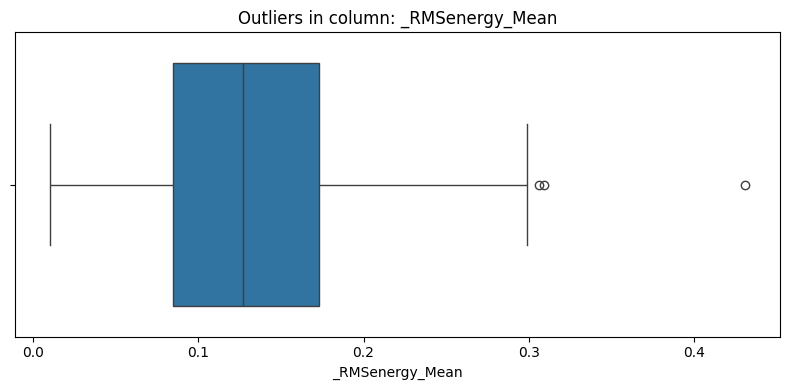

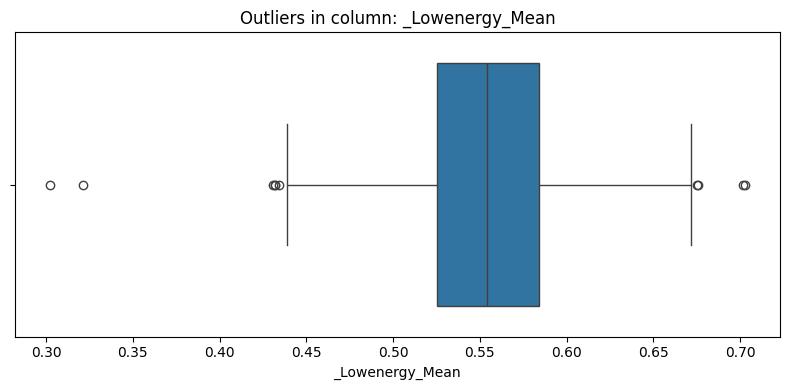

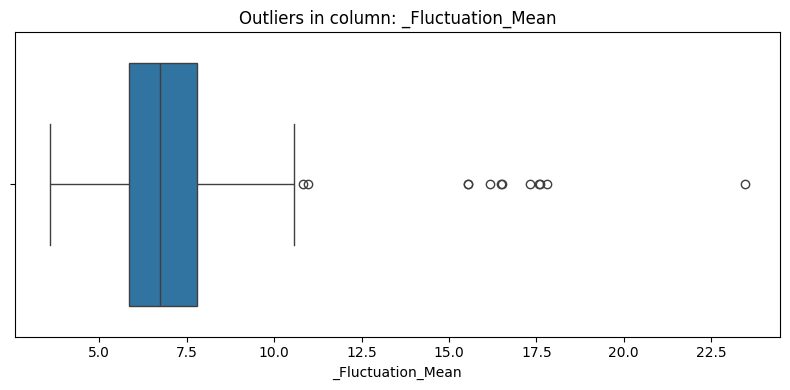

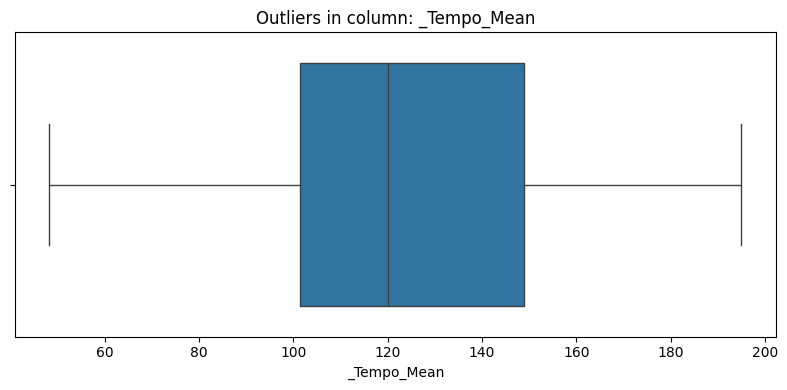

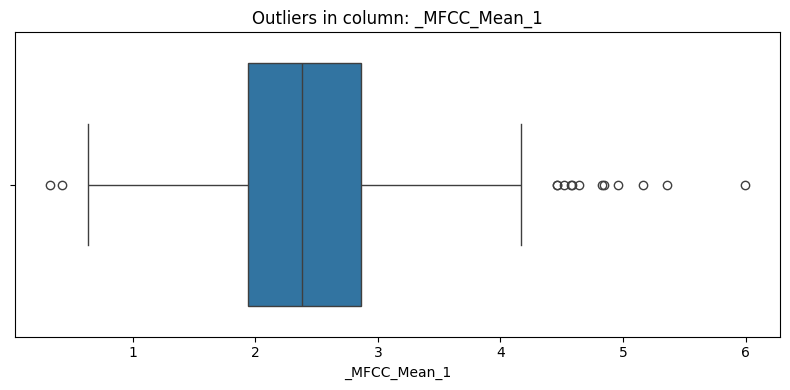

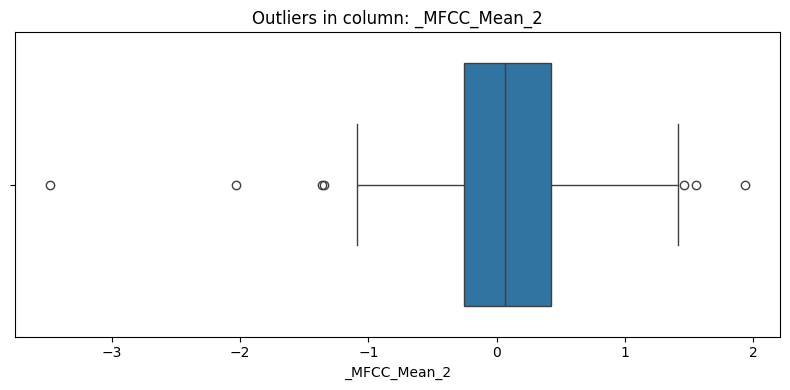

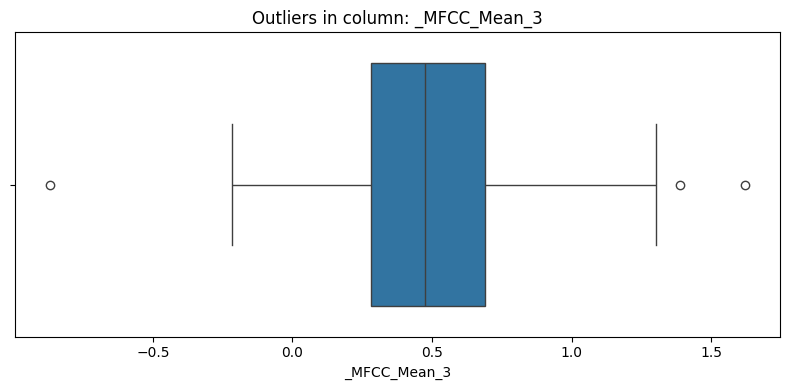

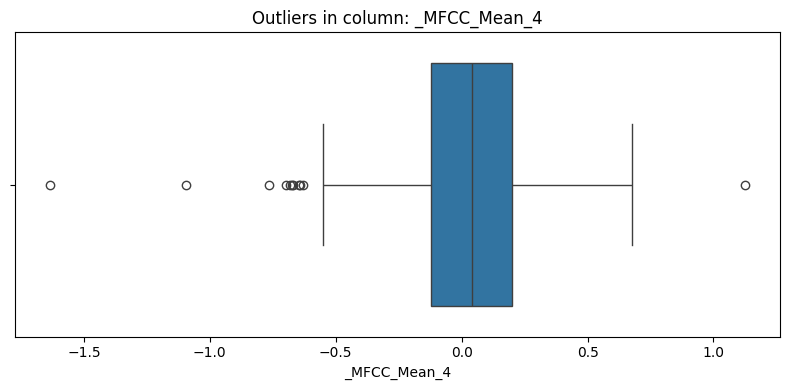

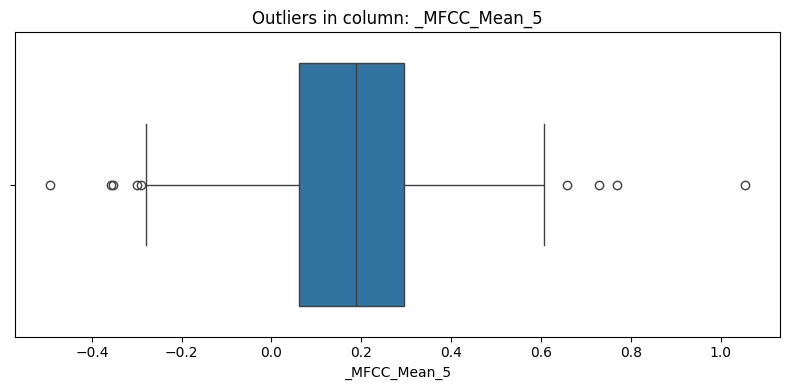

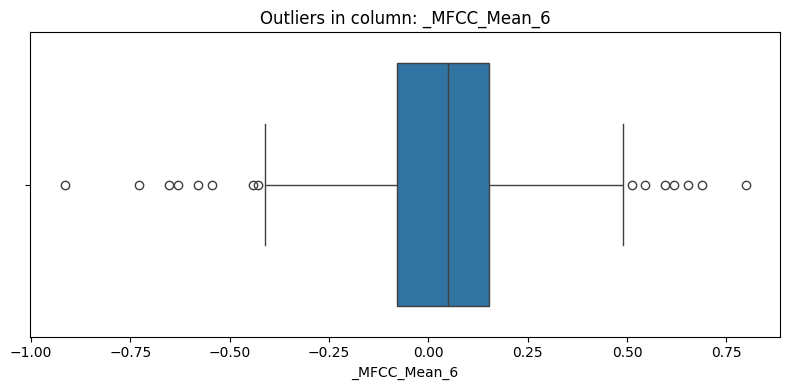

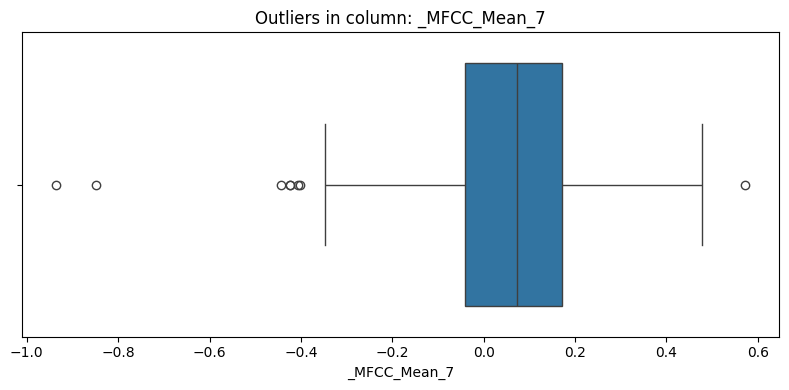

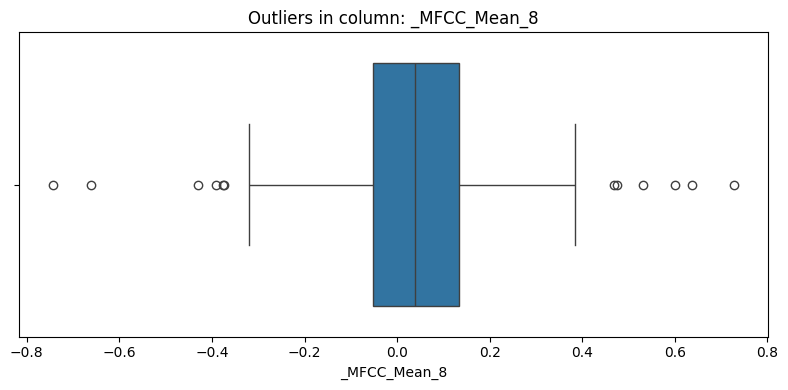

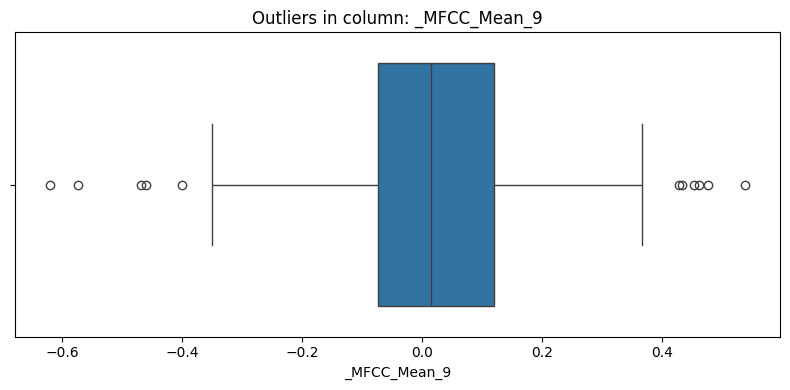

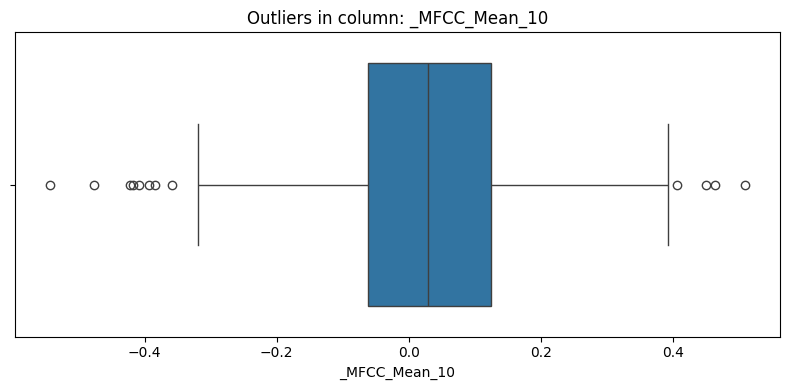

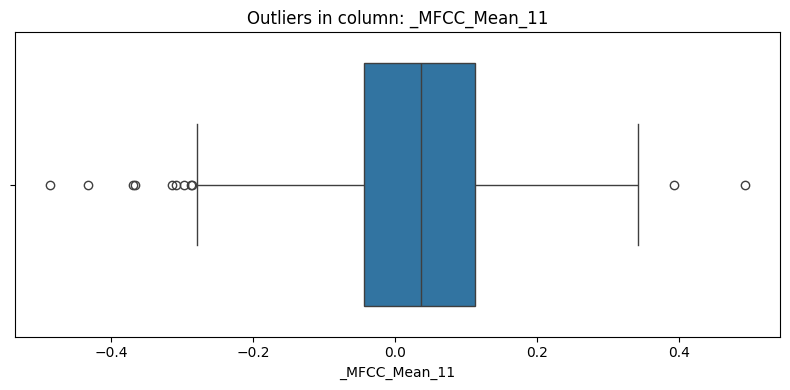

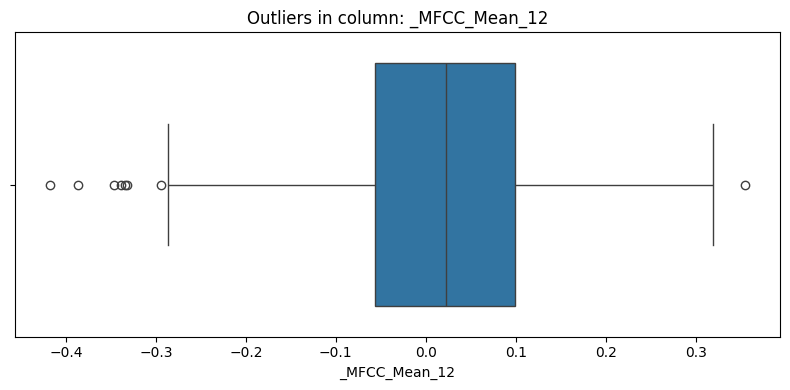

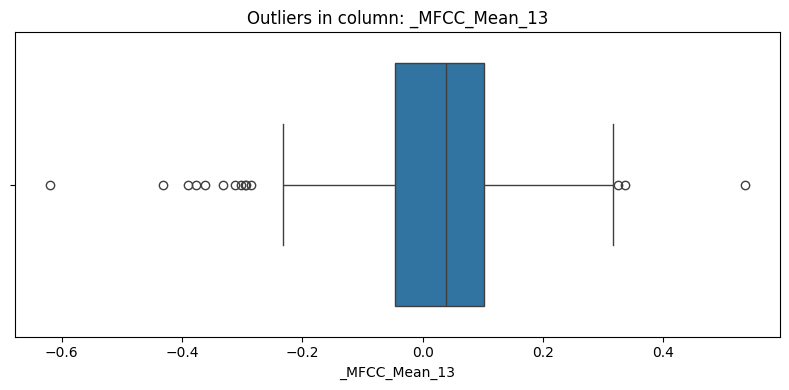

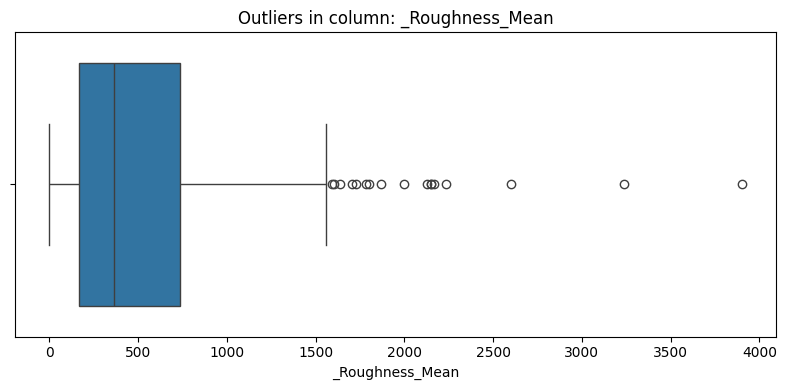

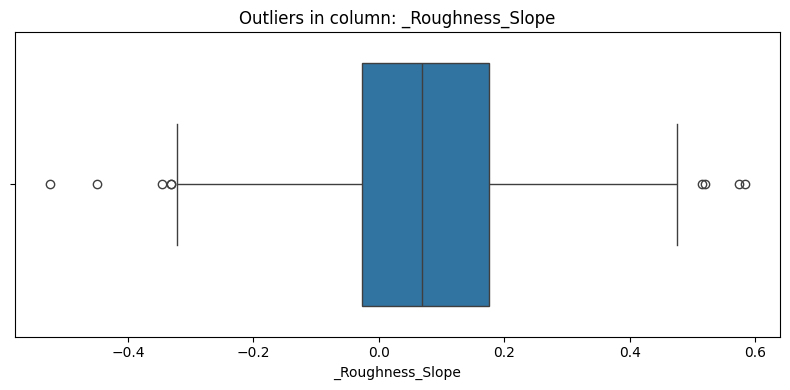

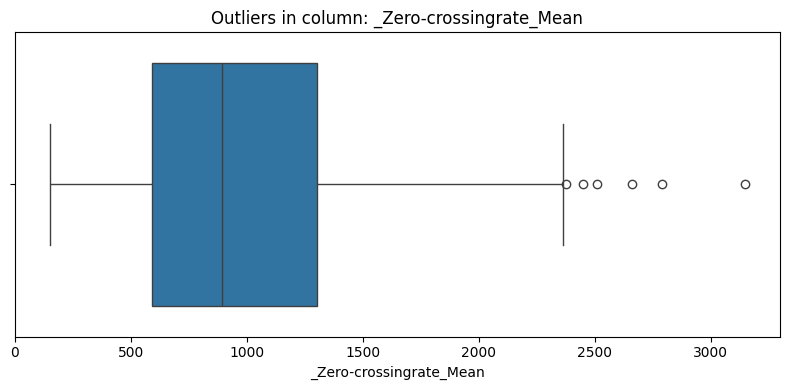

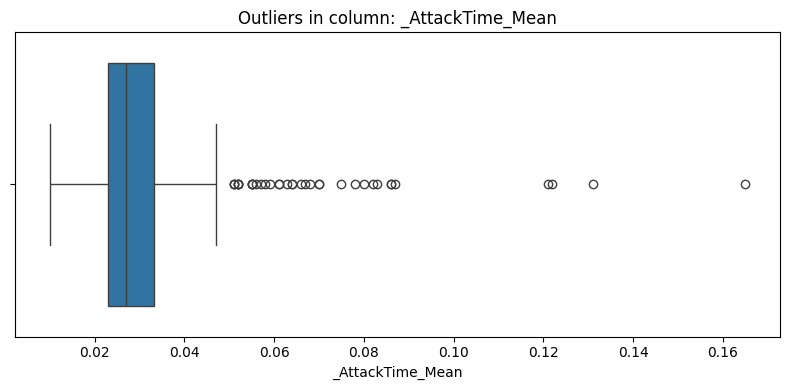

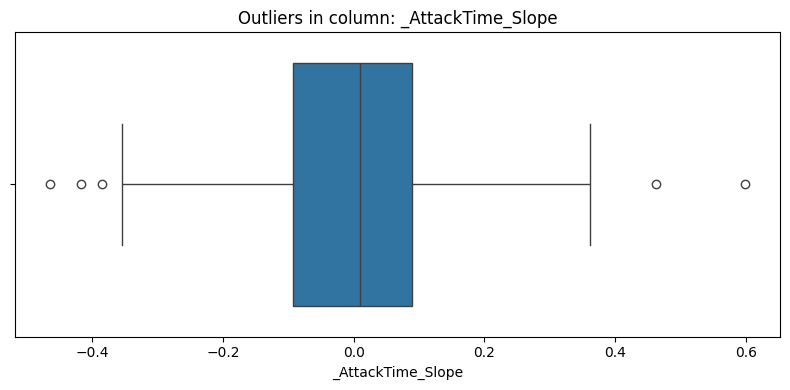

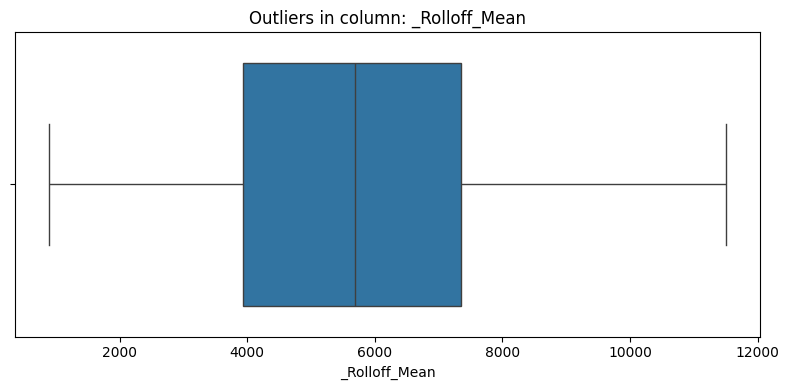

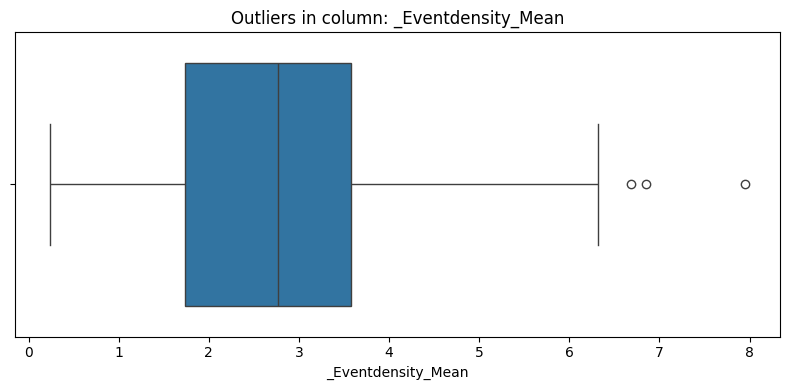

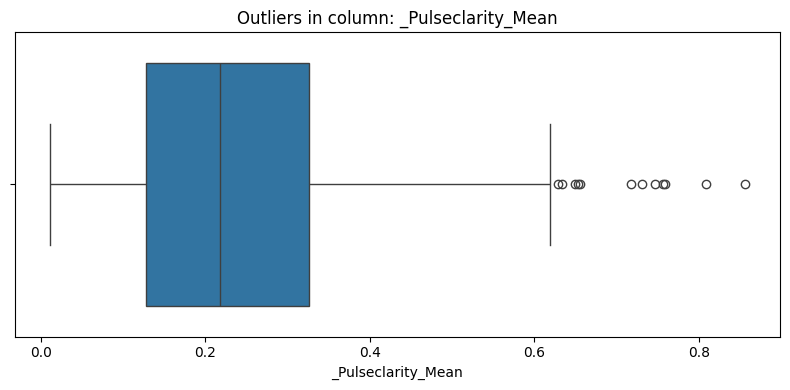

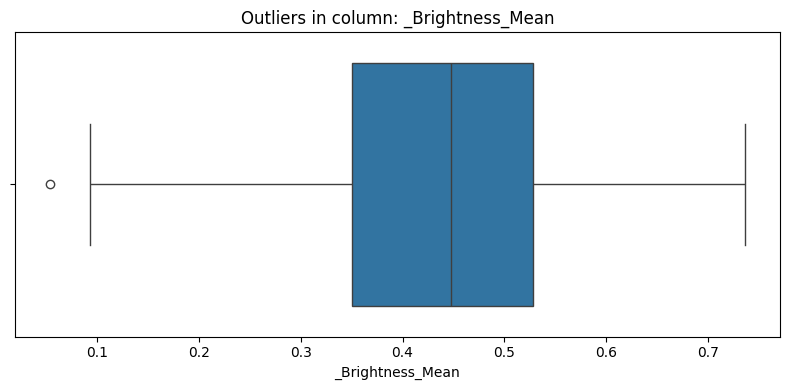

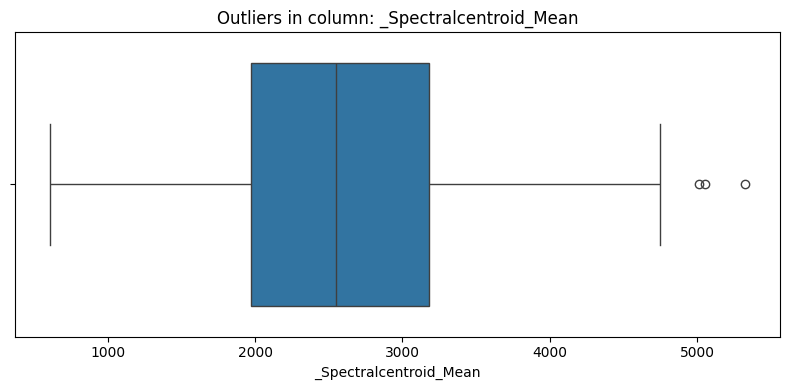

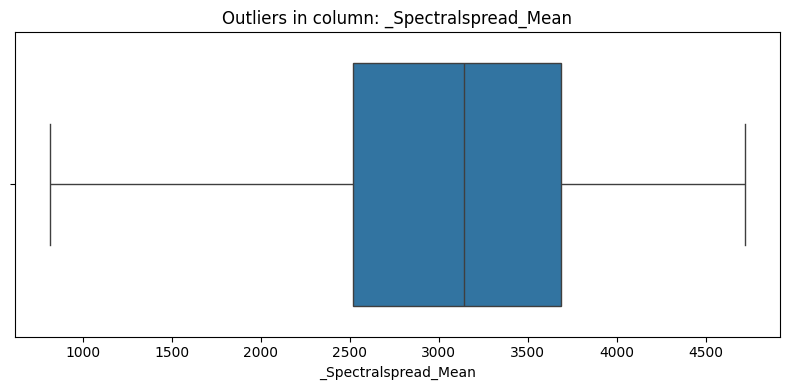

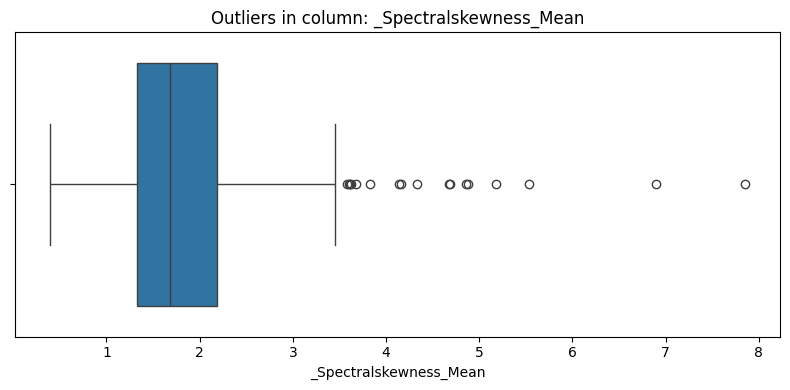

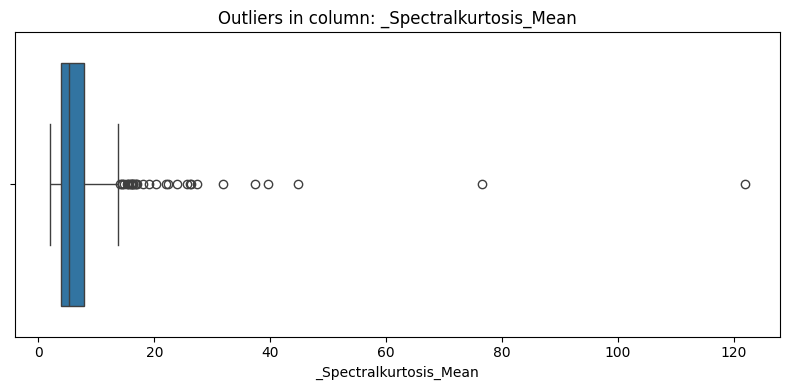

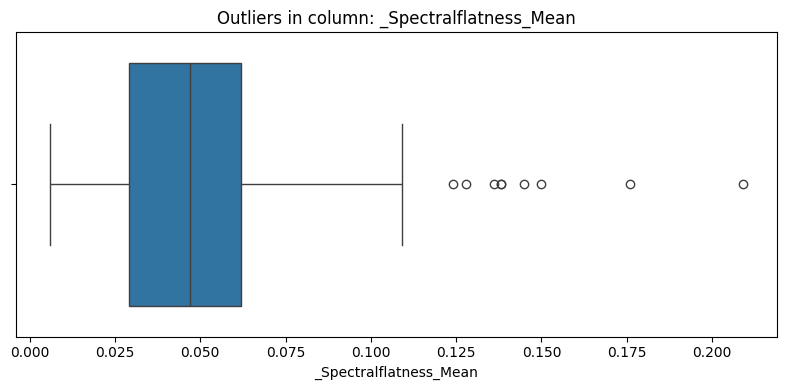

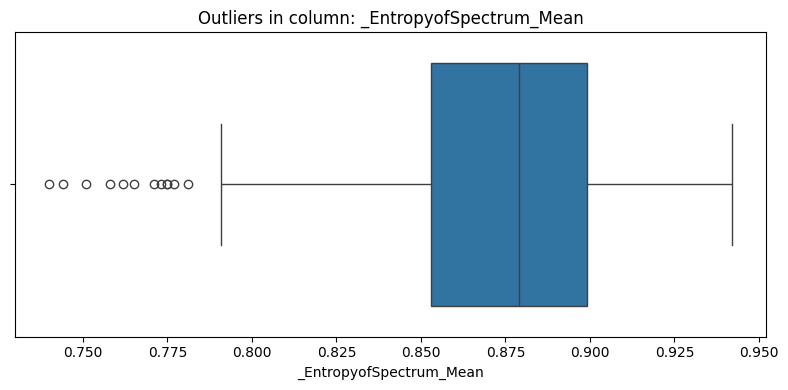

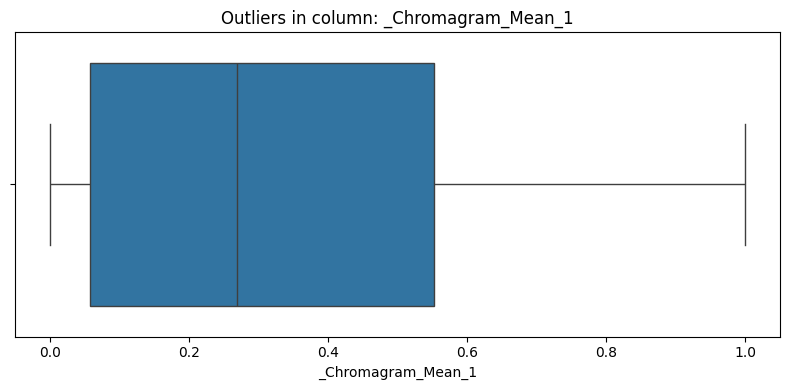

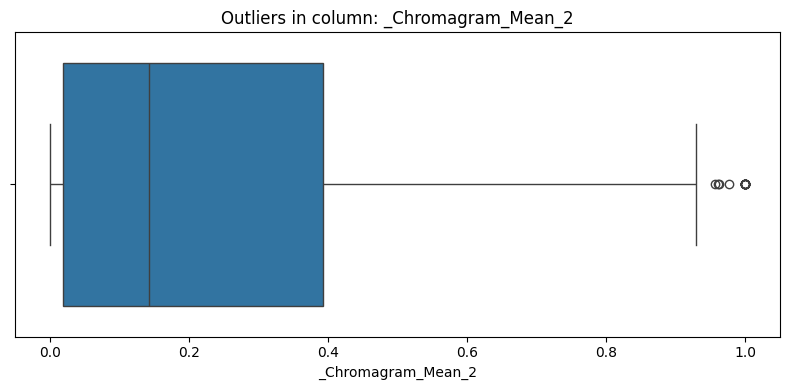

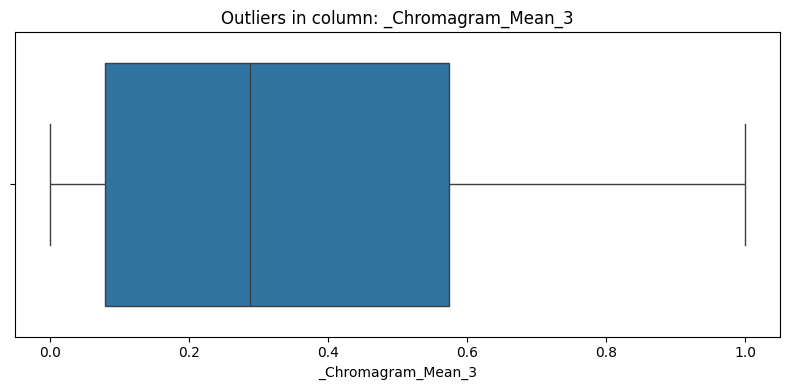

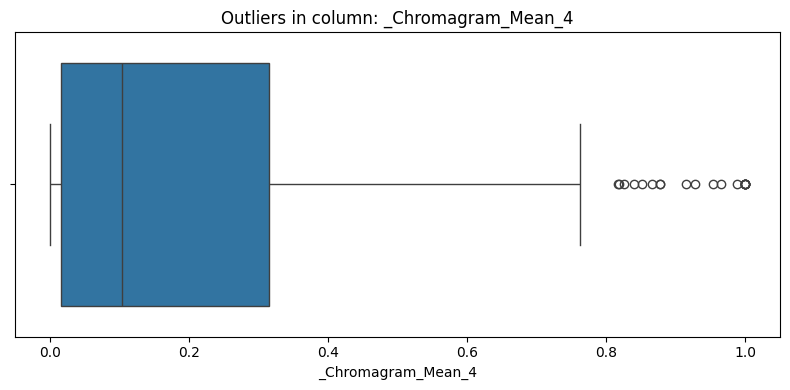

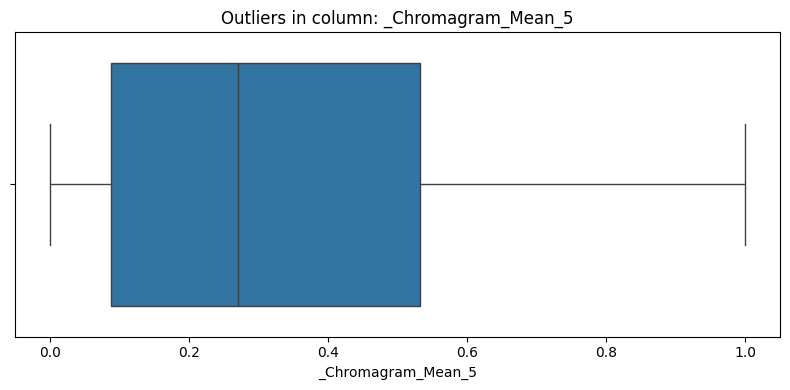

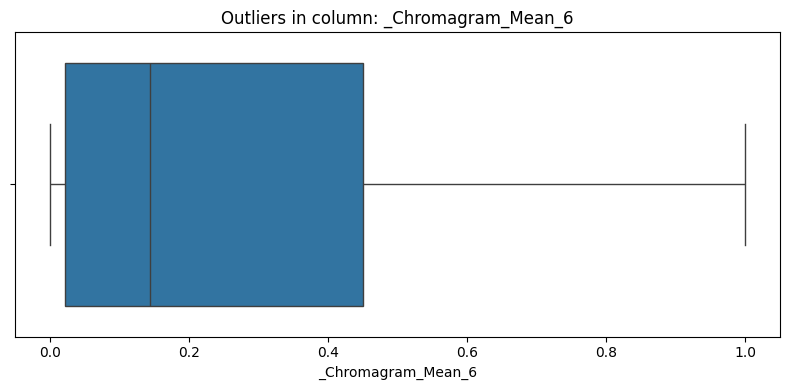

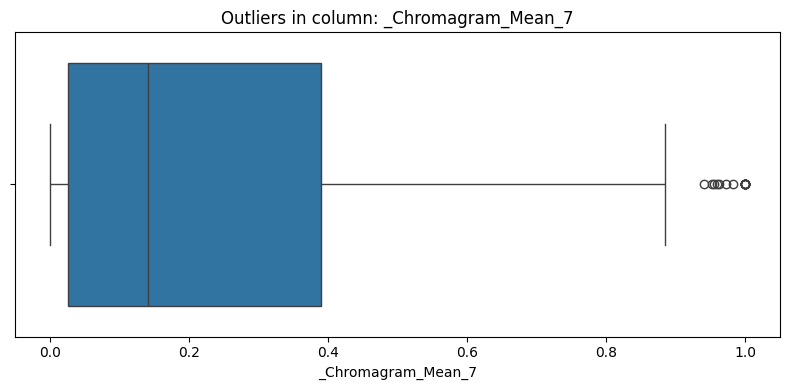

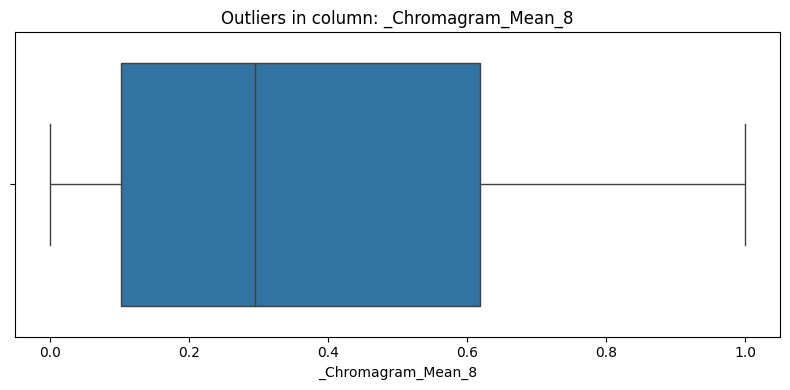

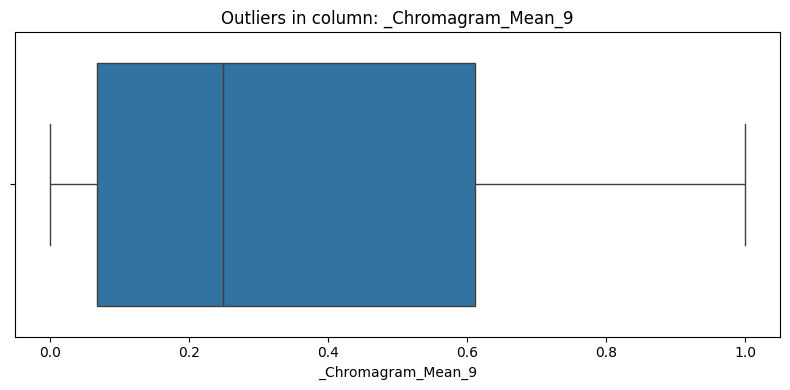

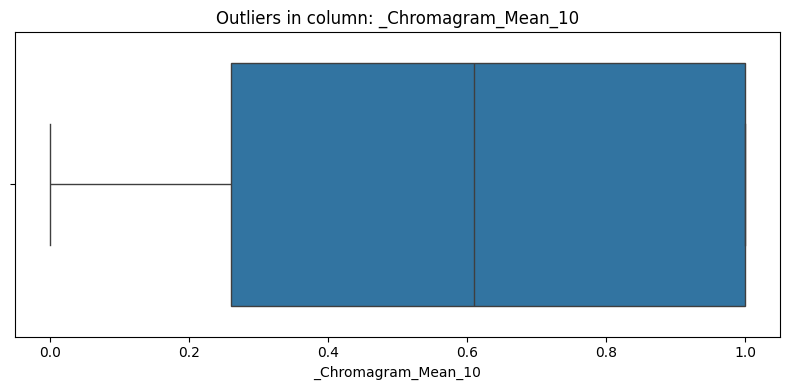

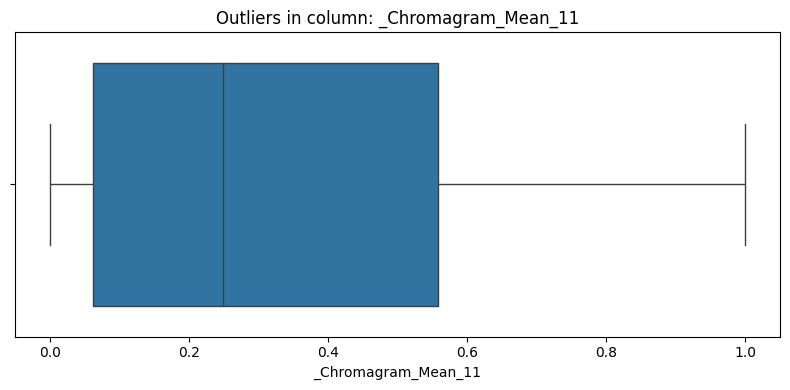

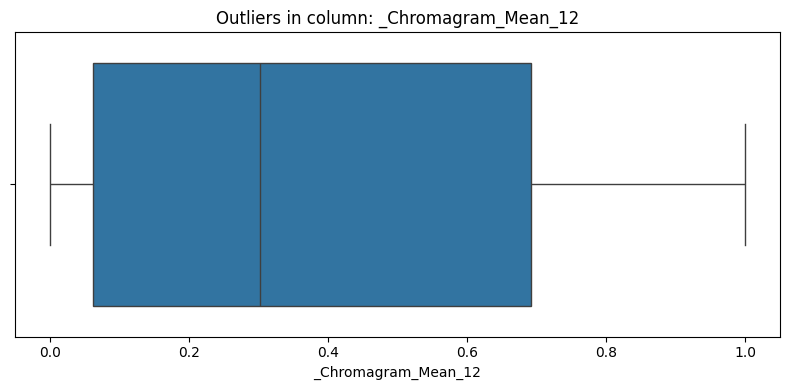

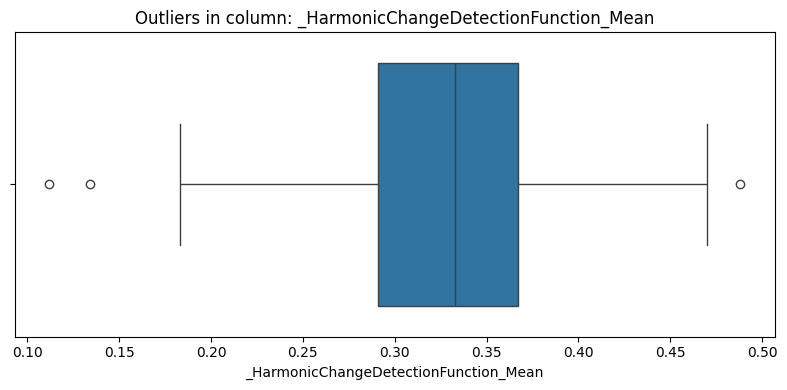

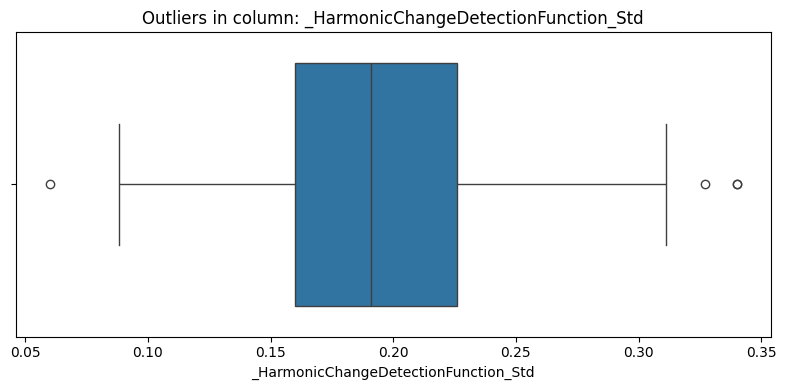

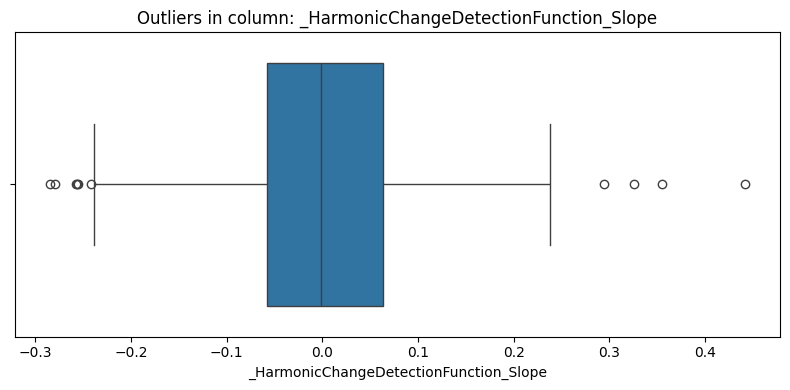

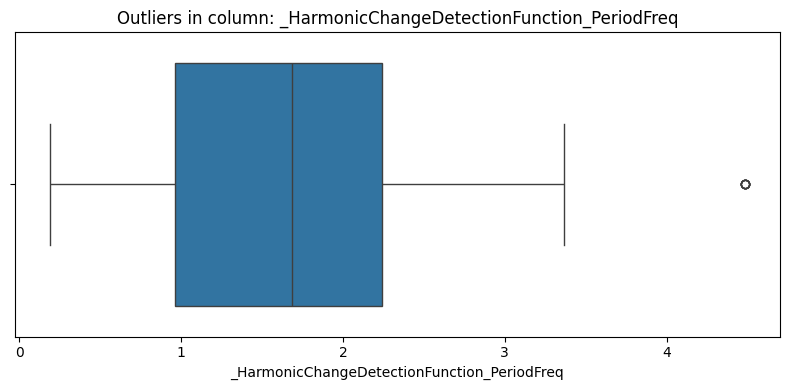

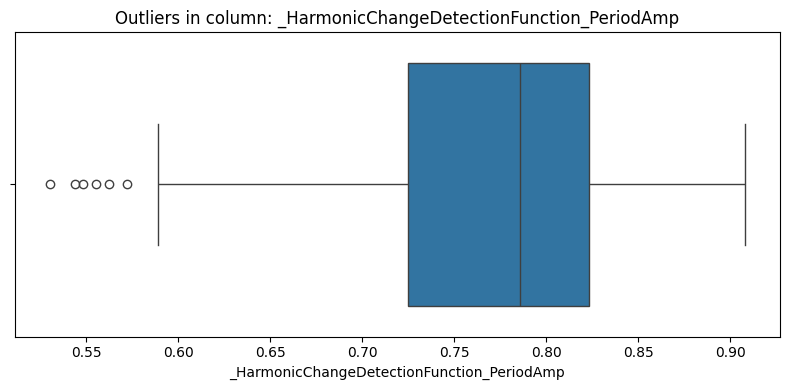

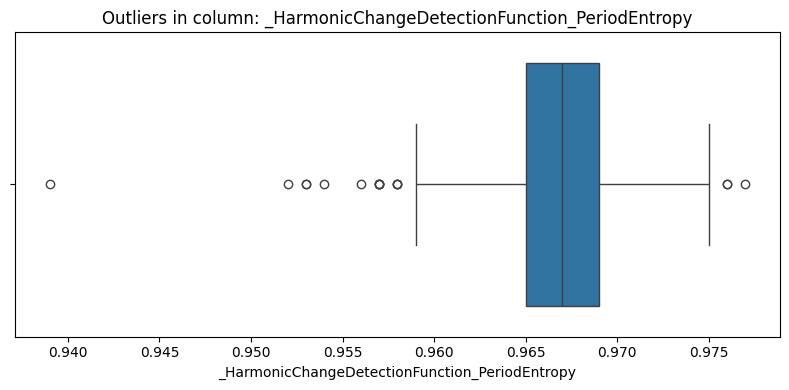

In [115]:
numeric_columns = df.select_dtypes(include='number').columns


for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in column: {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

## Remove outliers

In [116]:
for col in numeric_columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

## Validate outliers visually after the removal process

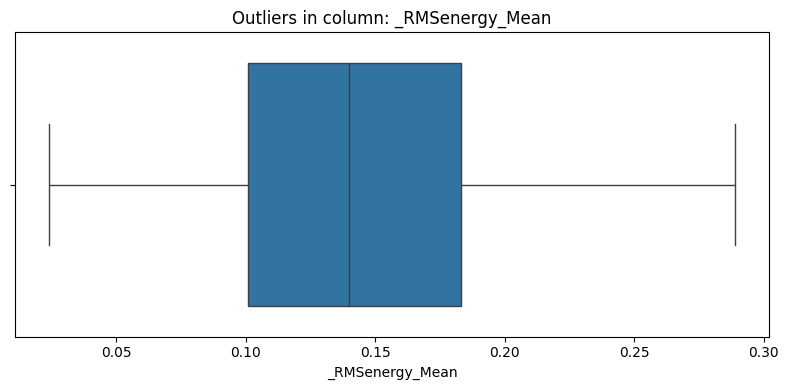

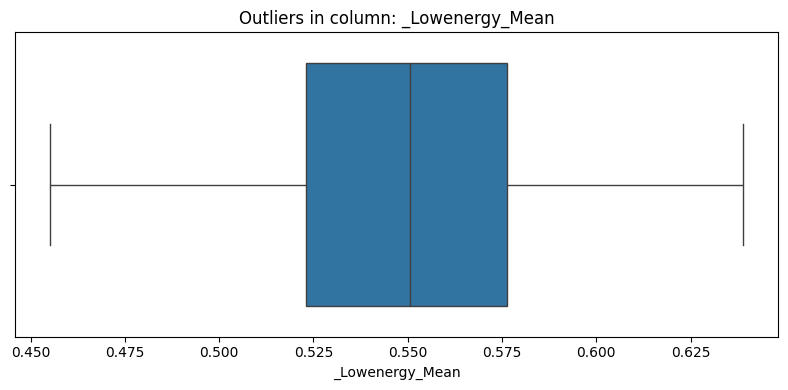

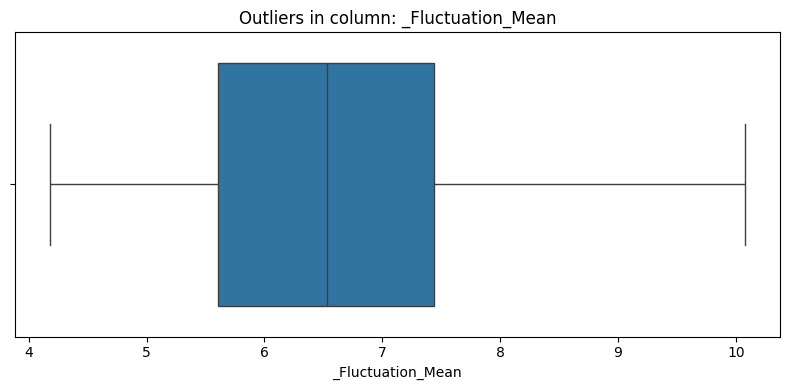

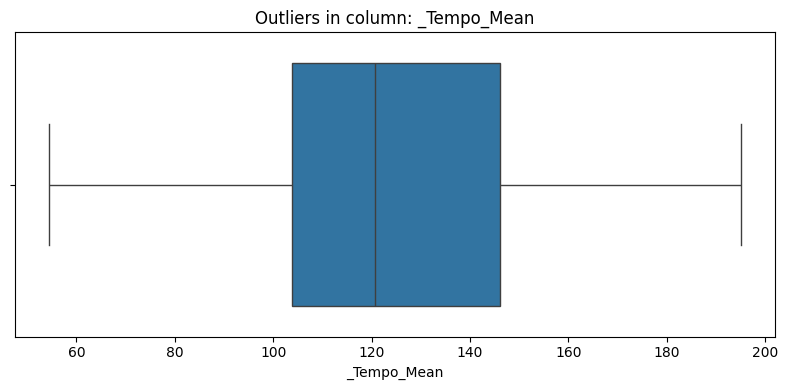

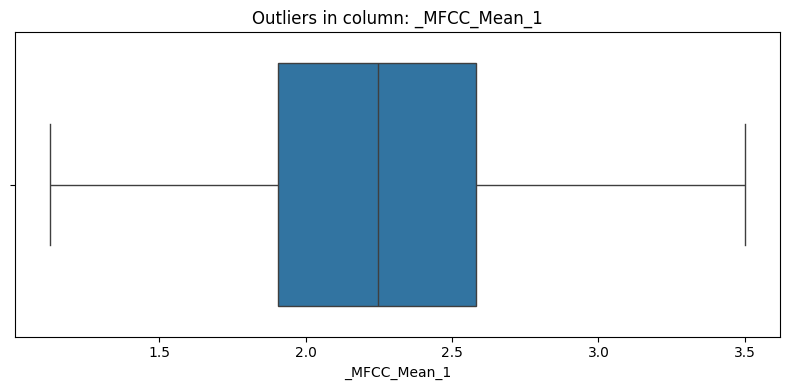

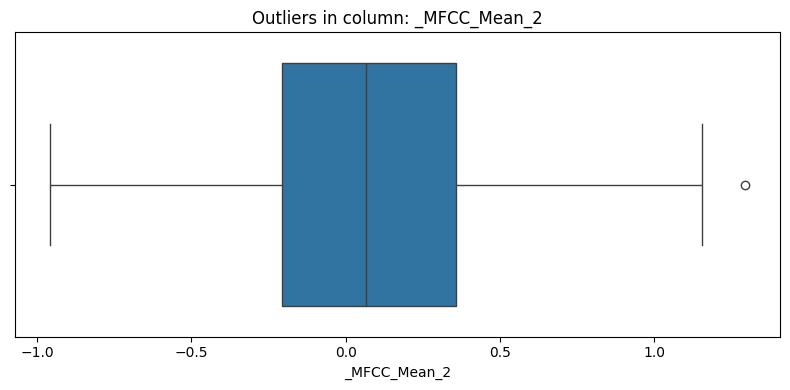

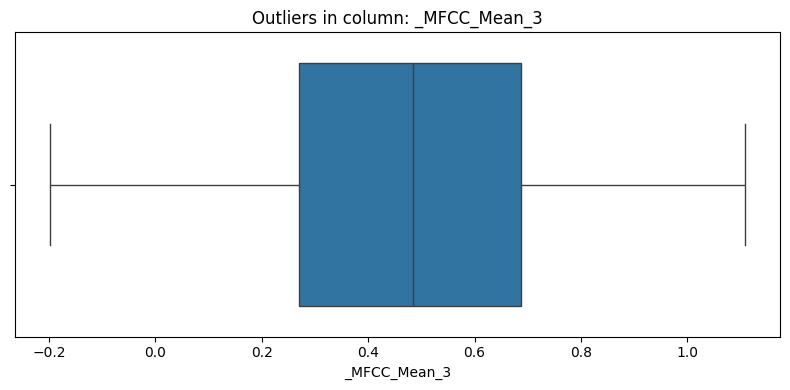

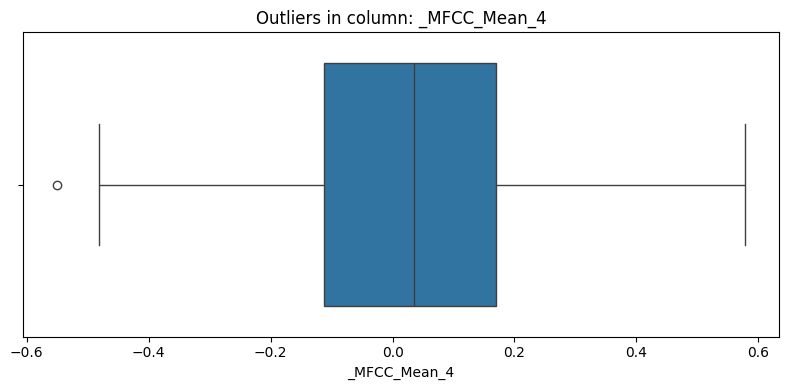

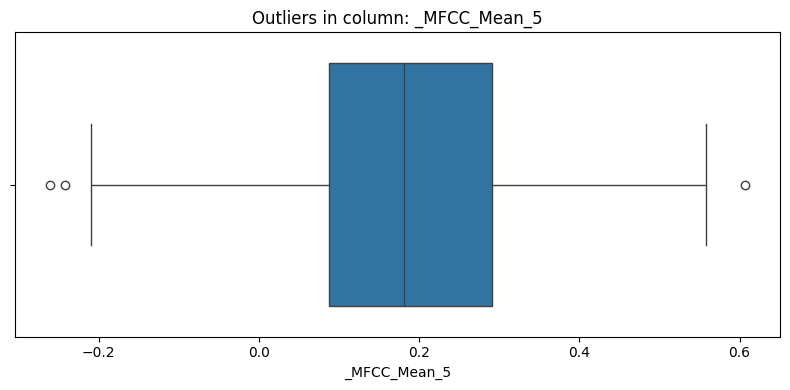

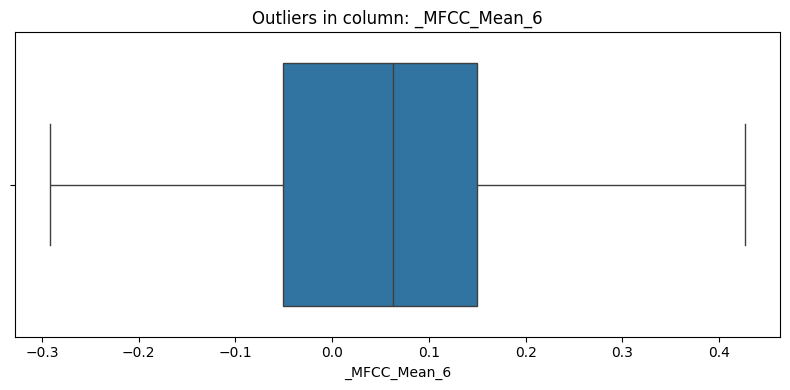

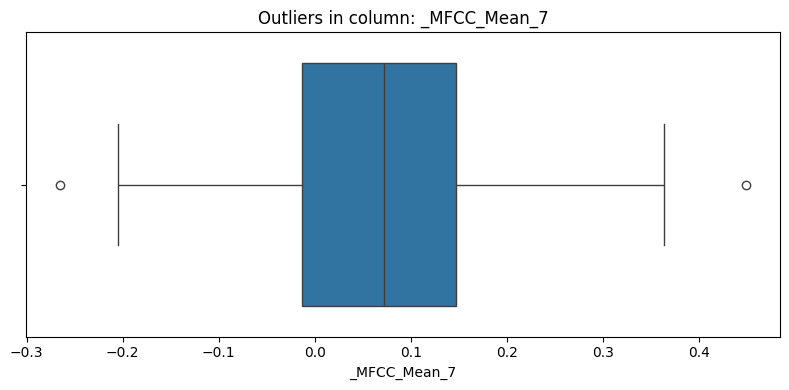

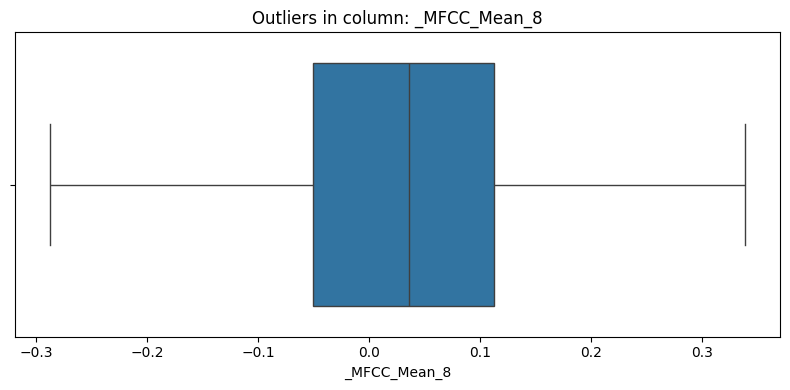

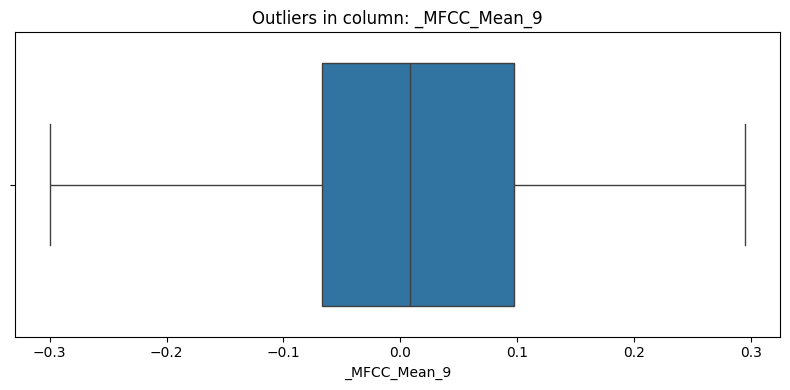

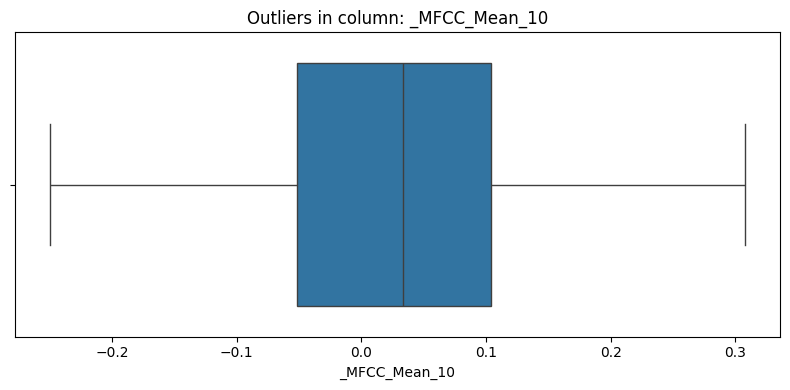

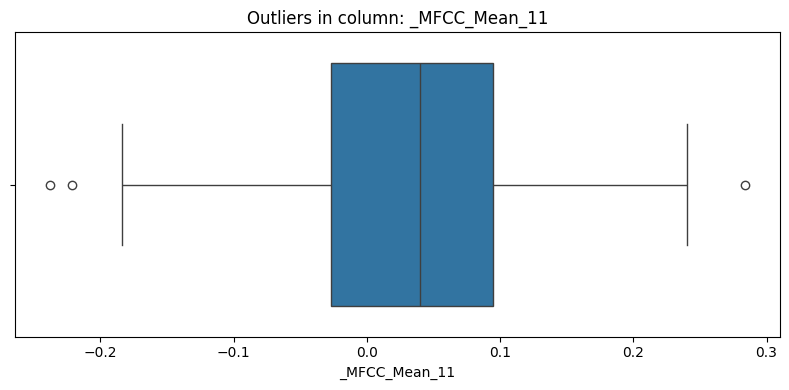

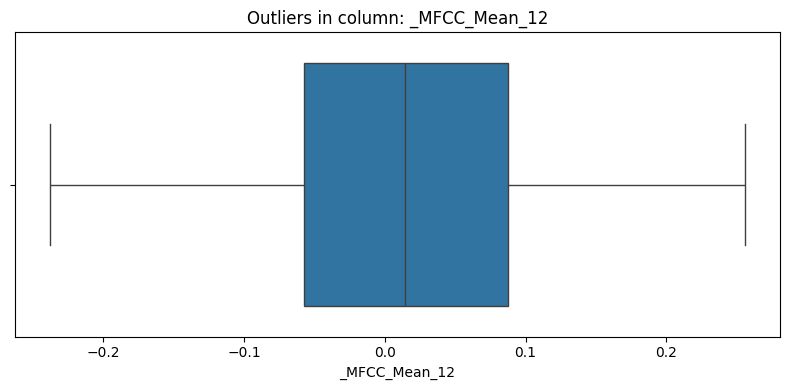

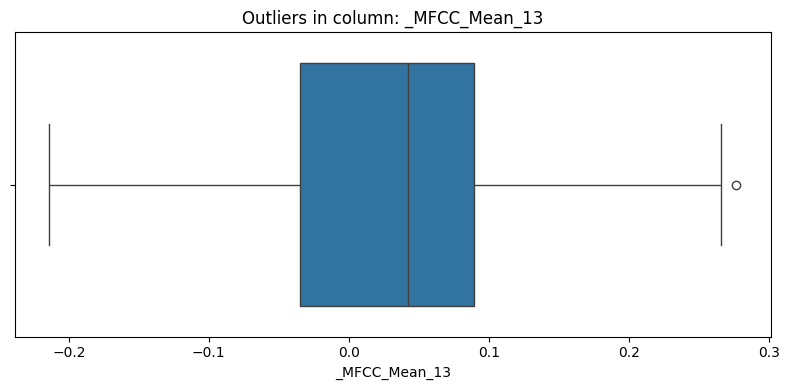

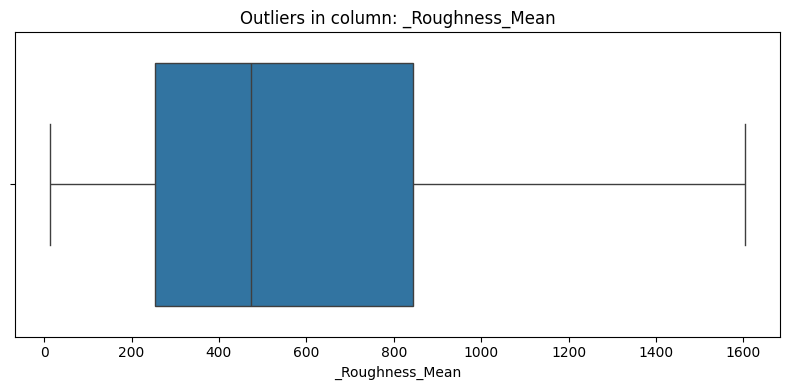

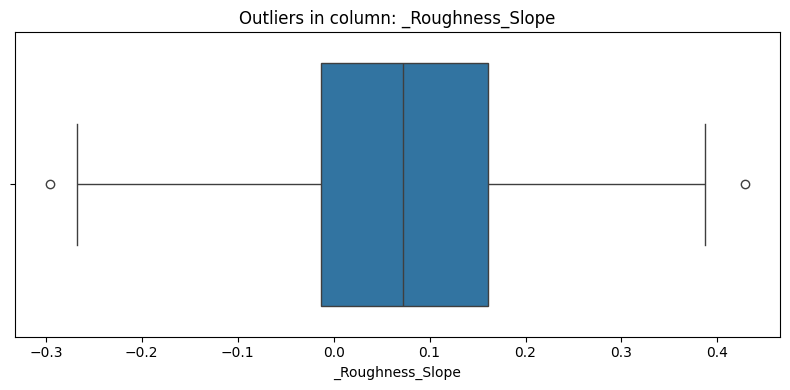

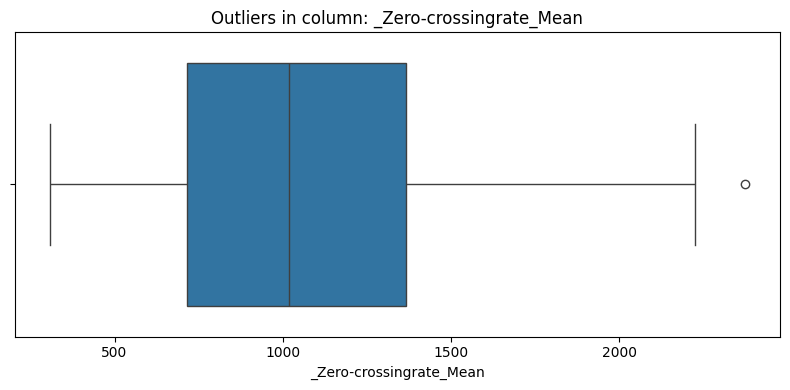

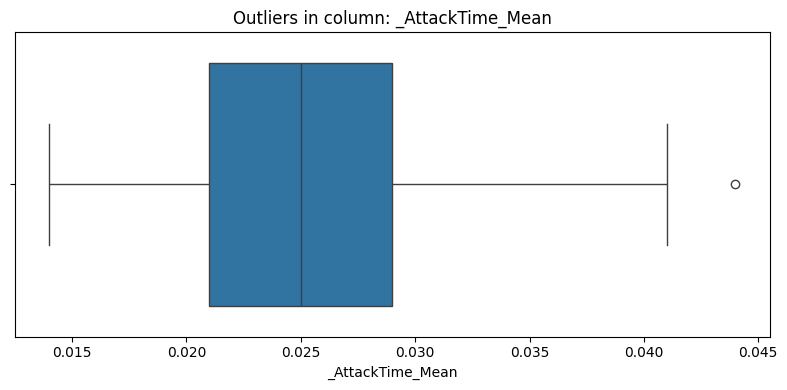

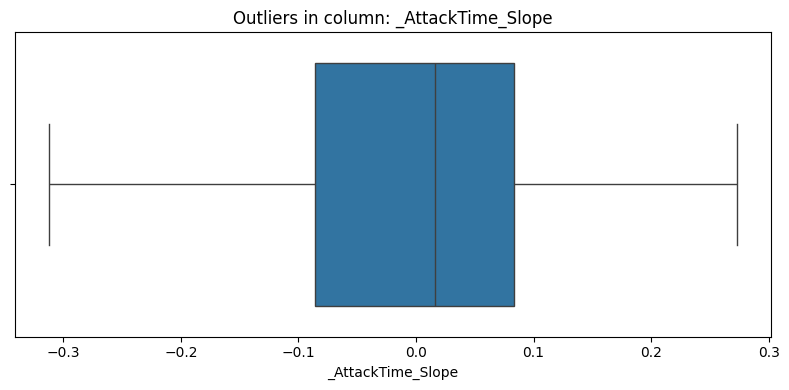

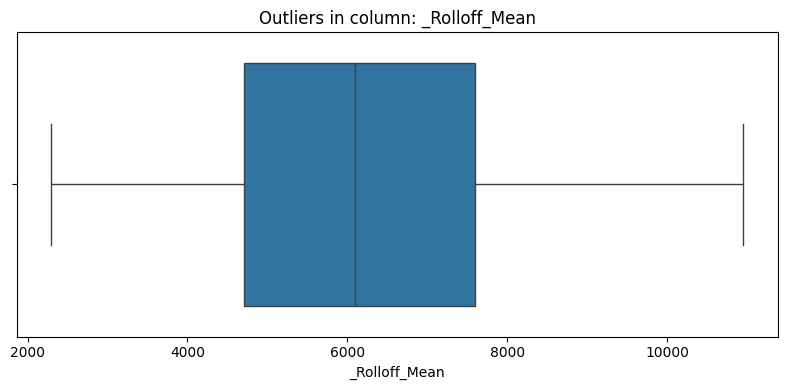

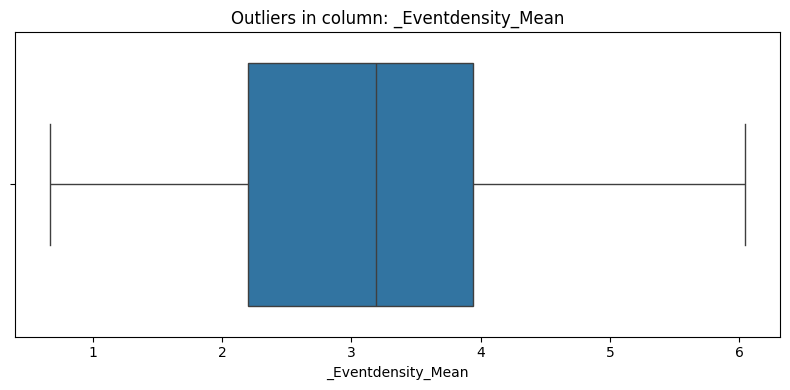

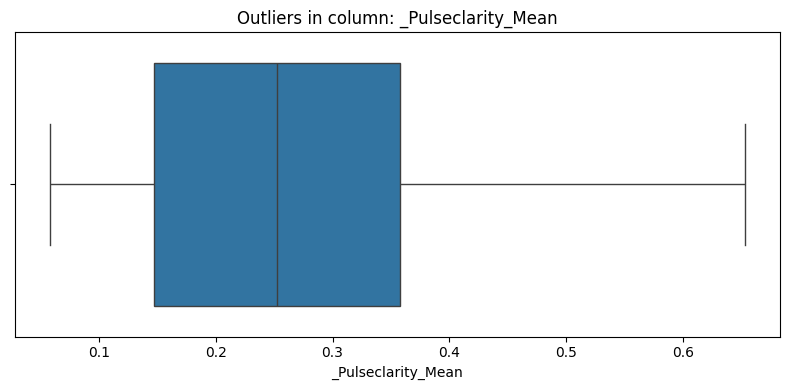

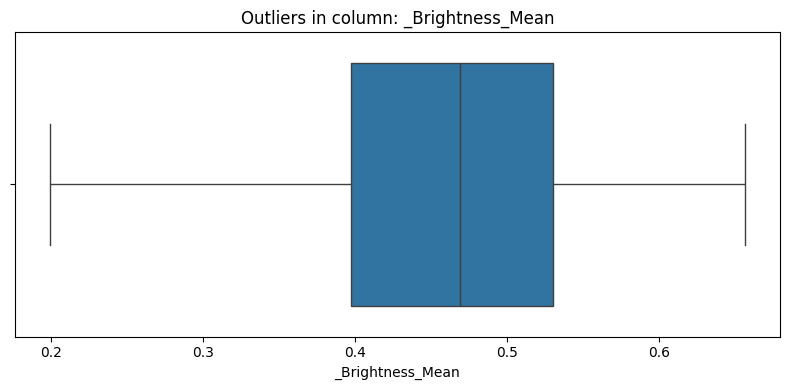

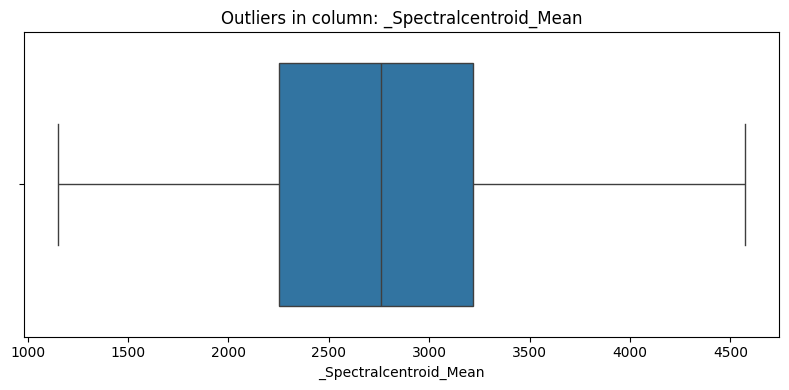

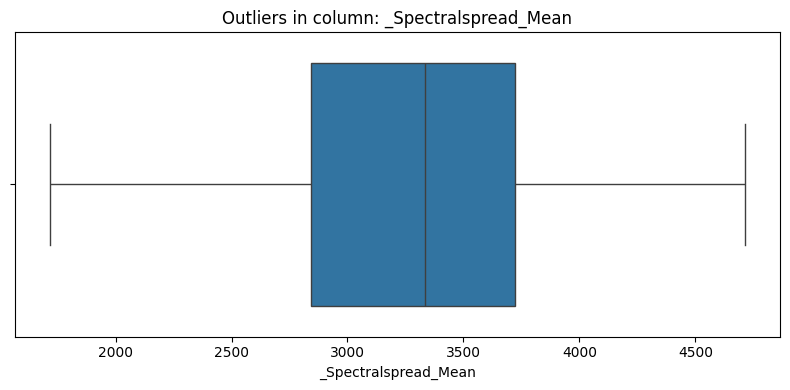

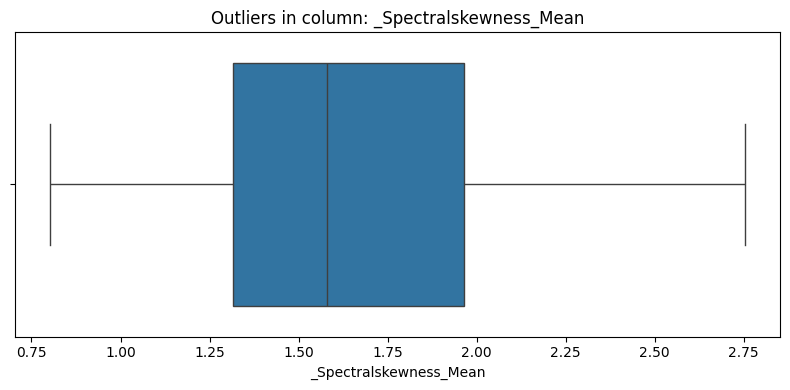

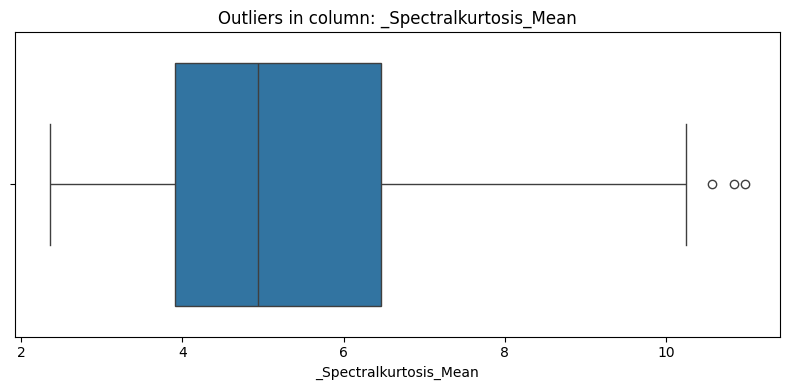

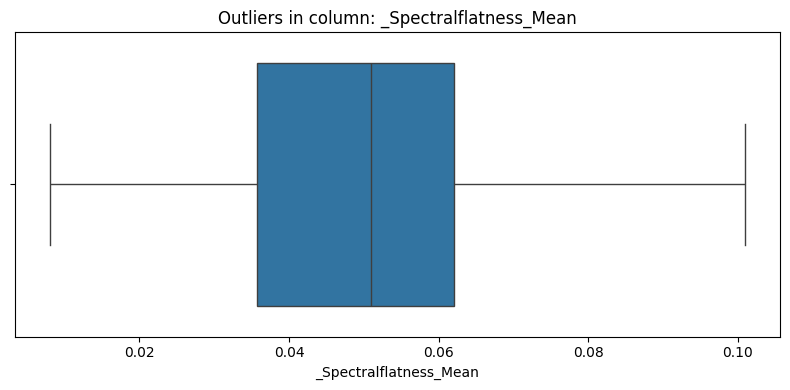

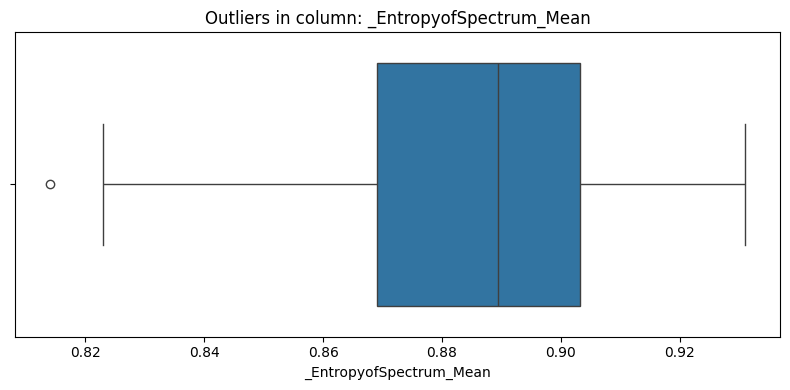

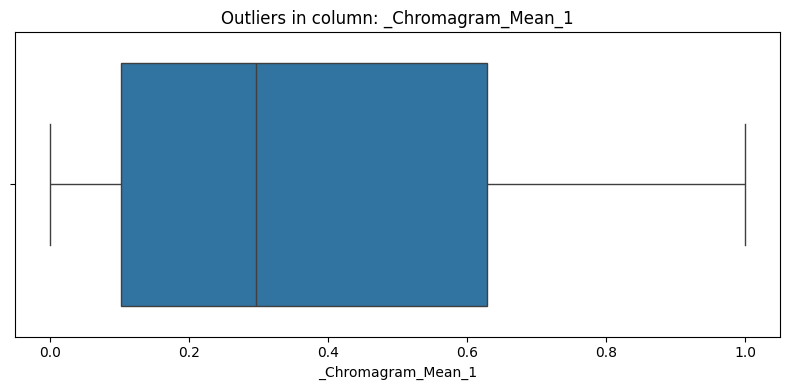

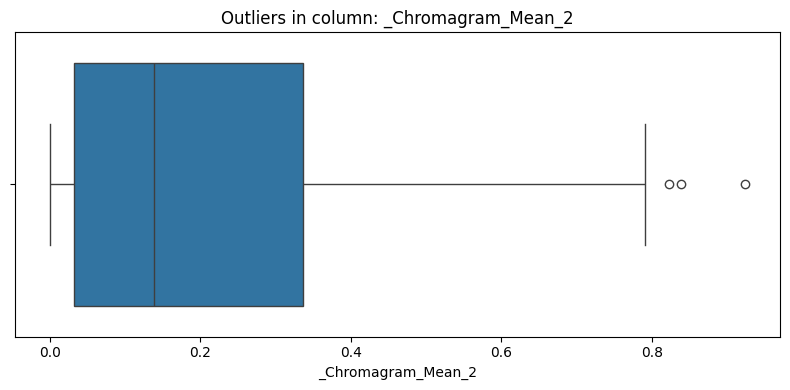

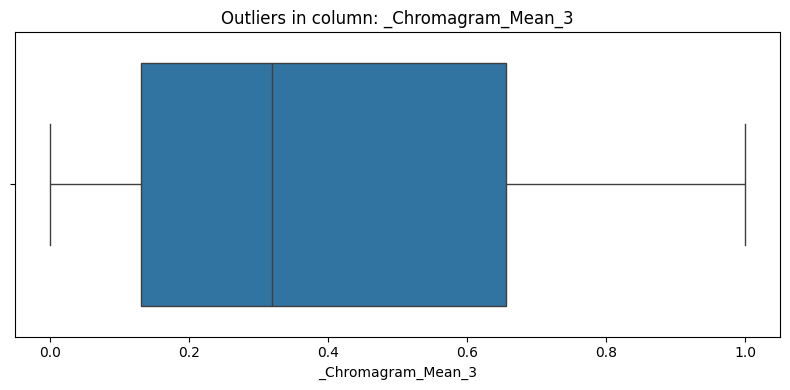

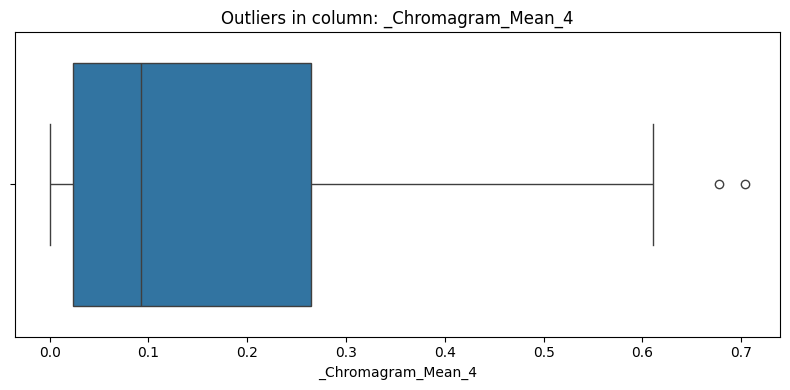

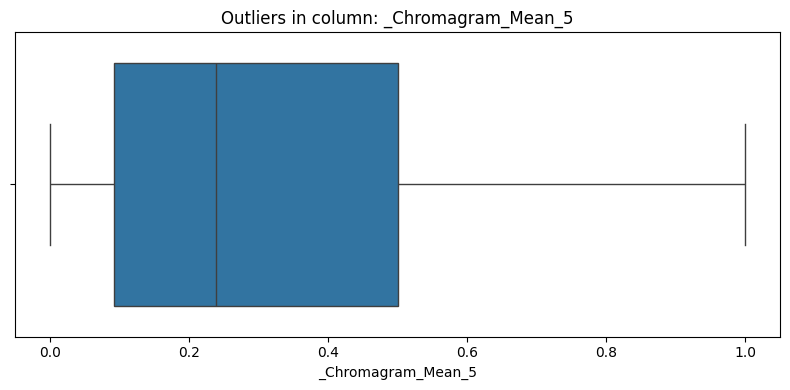

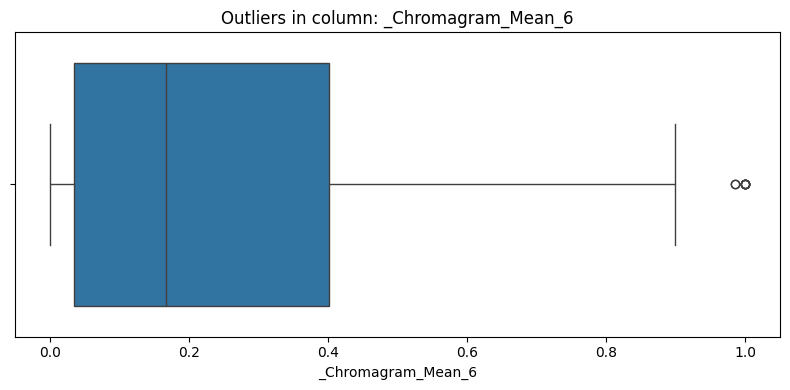

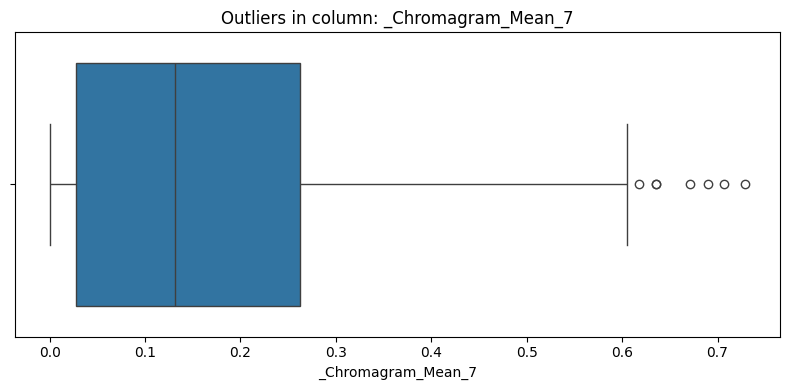

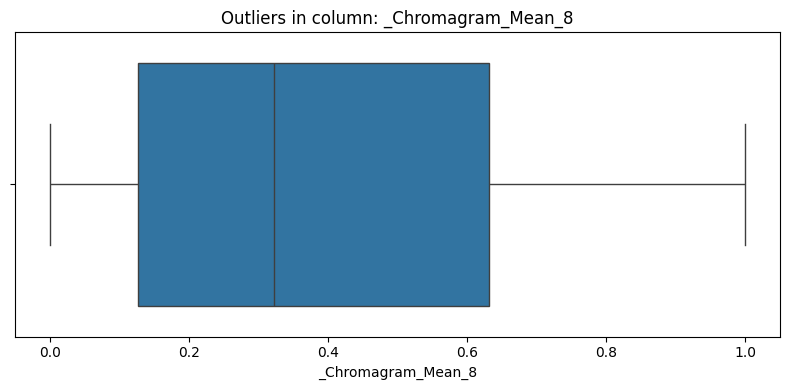

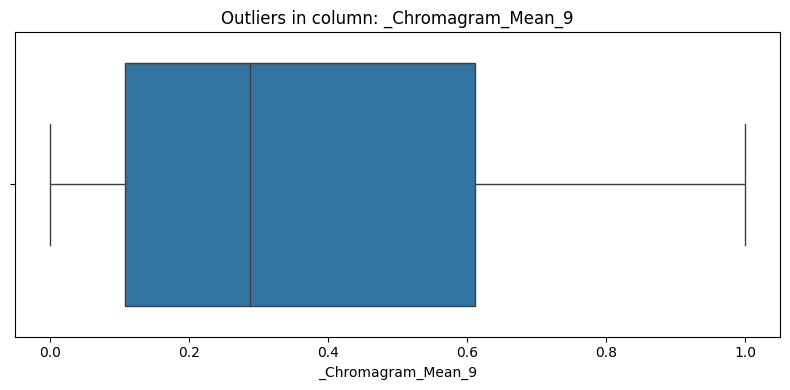

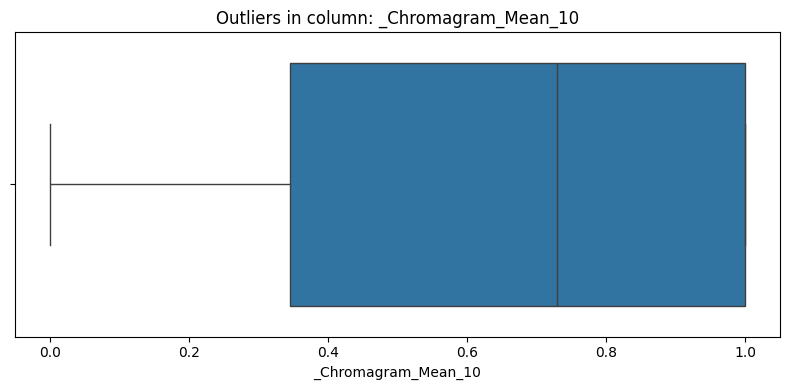

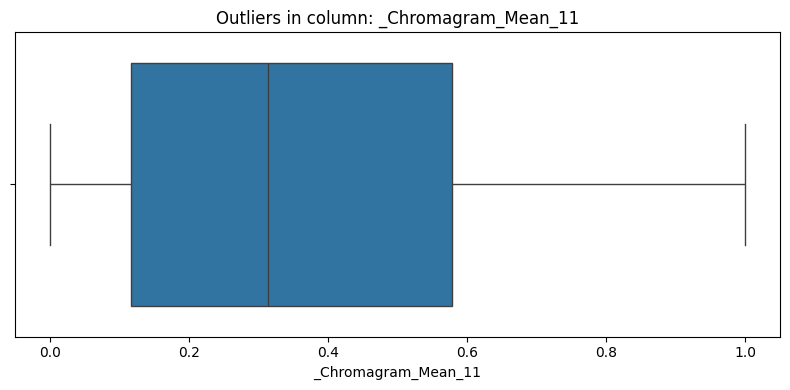

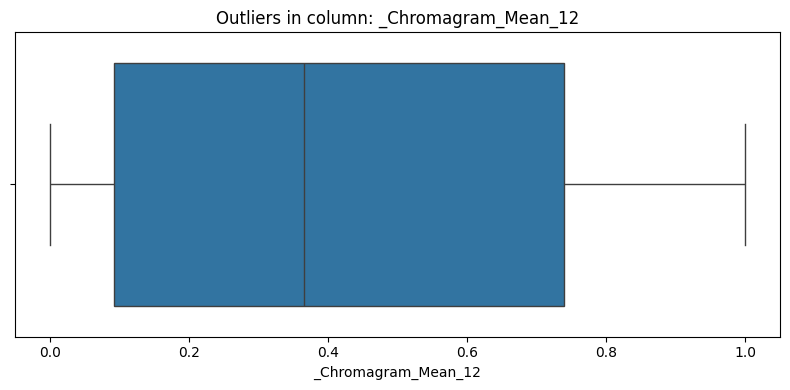

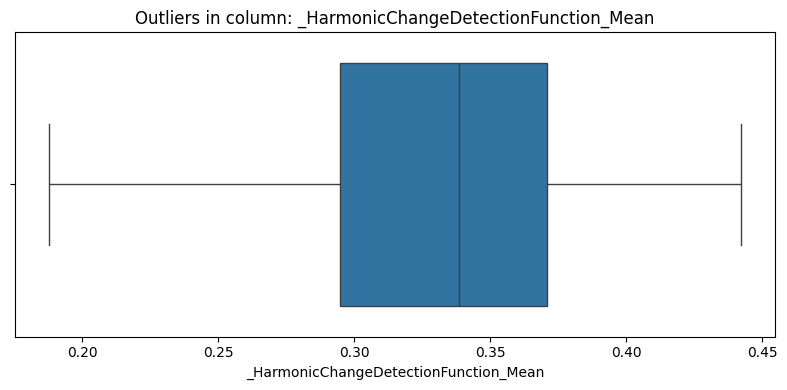

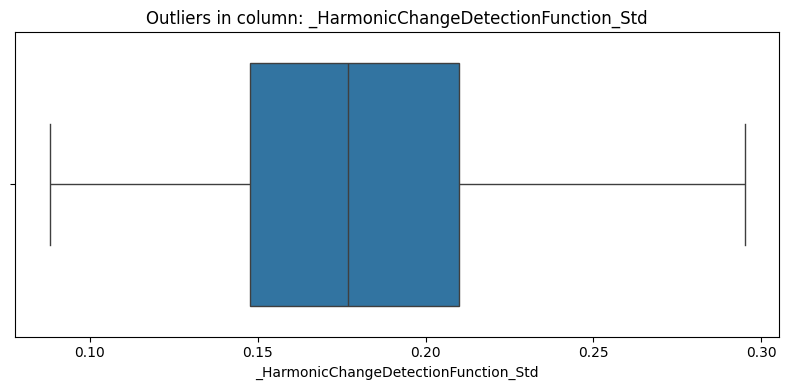

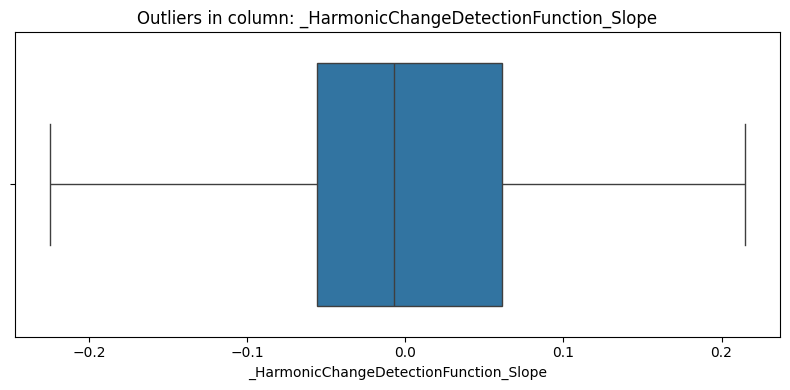

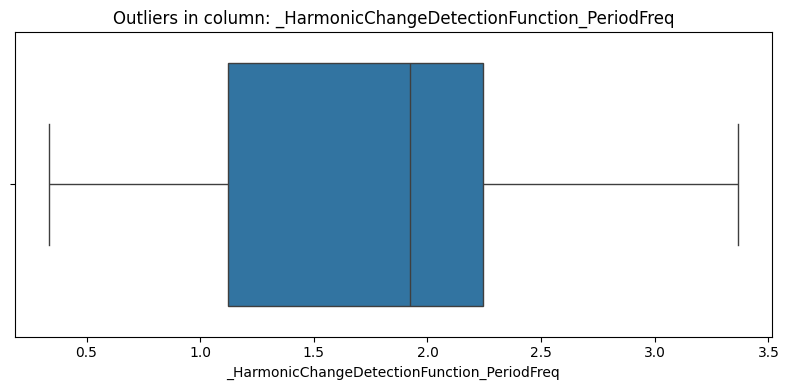

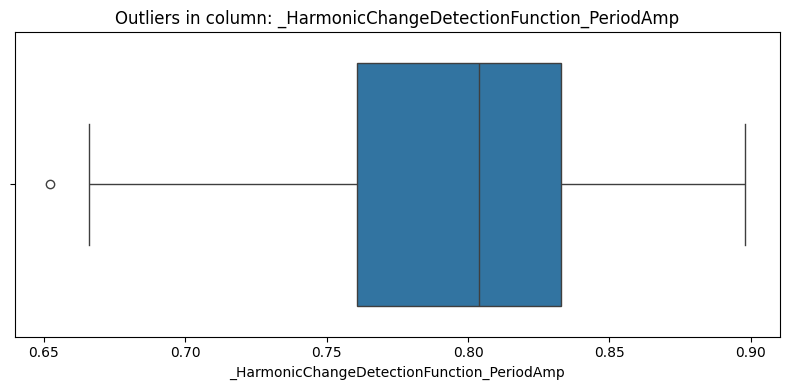

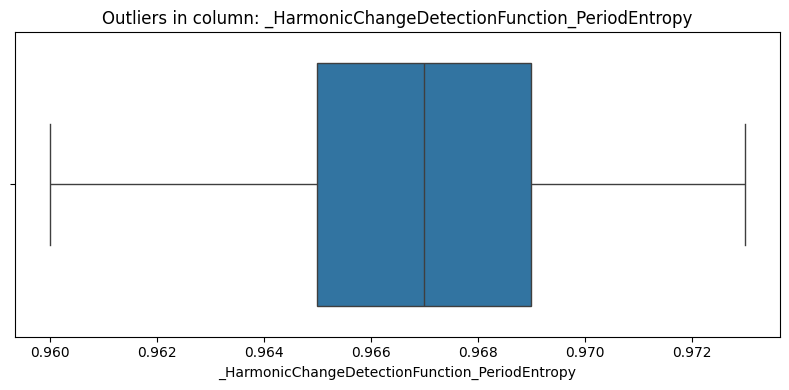

In [117]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in column: {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

## **EDA**

In [118]:
df.describe()

_RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
count       152.000000       152.000000         152.000000   152.000000   
mean          0.140914         0.549513           6.591776   124.542322   
std           0.055176         0.037433           1.338333    32.777001   
min           0.024000         0.455000           4.178000    54.514000   
25%           0.101000         0.523000           5.604250   103.784250   
50%           0.140000         0.550500           6.535000   120.752000   
75%           0.183250         0.576250           7.436750   146.179500   
max           0.289000         0.639000          10.080000   195.026000   

       _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  \
count    152.000000    152.000000    152.000000    152.000000    152.000000   
mean       2.247783      0.074533      0.490309      0.029803      0.186638   
std        0.489211      0.432812      0.263231      0.211857      0.166896   
min        1.126000     -0.959000     -0.199000     -0.550000     -0.261000   
25%        1.906500     -0.207500      0.270500     -0.113250      0.087000   
50%        2.247500      0.067000      0.485000      0.035500      0.181000   
75%        2.580250      0.357250      0.688000      0.169250      0.291500   
max        3.501000      1.294000      1.109000      0.578000      0.607000   

       _MFCC_Mean_6  ...  _Chromagram_Mean_9  _Chromagram_Mean_10  \
count    152.000000  ...          152.000000           152.000000   
mean       0.049243  ...            0.373059             0.644664   
std        0.151657  ...            0.315190             0.337528   
min       -0.292000  ...            0.000000             0.000000   
25%       -0.050750  ...            0.107750             0.345250   
50%        0.062500  ...            0.287500             0.729500   
75%        0.150250  ...            0.611500             1.000000   
max        0.427000  ...            1.000000             1.000000   

       _Chromagram_Mean_11  _Chromagram_Mean_12  \
count           152.000000           152.000000   
mean              0.373697             0.423336   
std               0.297236             0.354047   
min               0.000000             0.000000   
25%               0.116500             0.092500   
50%               0.313500             0.365500   
75%               0.578000             0.739750   
max               1.000000             1.000000   

       _HarmonicChangeDetectionFunction_Mean  \
count                             152.000000   
mean                                0.329763   
std                                 0.051337   
min                                 0.188000   
25%                                 0.294750   
50%                                 0.338500   
75%                                 0.371000   
max                                 0.442000   

       _HarmonicChangeDetectionFunction_Std  \
count                            152.000000   
mean                               0.178421   
std                                0.038837   
min                                0.088000   
25%                                0.147750   
50%                                0.177000   
75%                                0.210000   
max                                0.295000   

       _HarmonicChangeDetectionFunction_Slope  \
count                              152.000000   
mean                                -0.002184   
std                                  0.097716   
min                                 -0.225000   
25%                                 -0.055750   
50%                                 -0.007000   
75%                                  0.061000   
max                                  0.215000   

       _HarmonicChangeDetectionFunction_PeriodFreq  \
count                                   152.000000   
mean                                      1.808500   
std                                       0.837001   
min                   

## Variable distributions

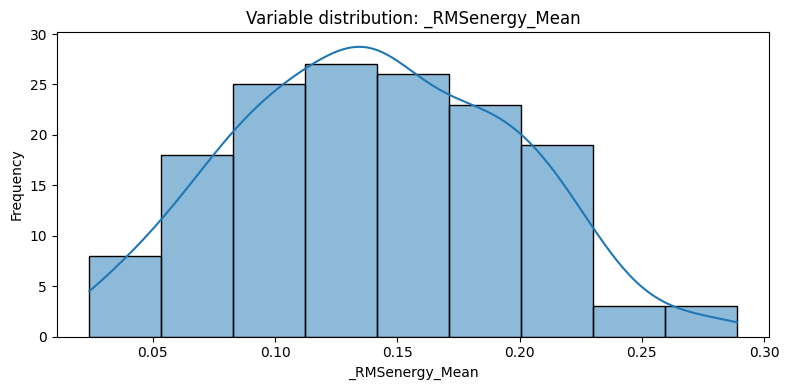

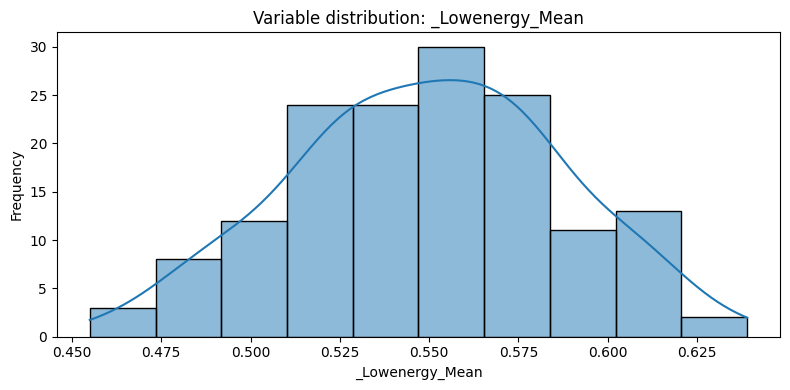

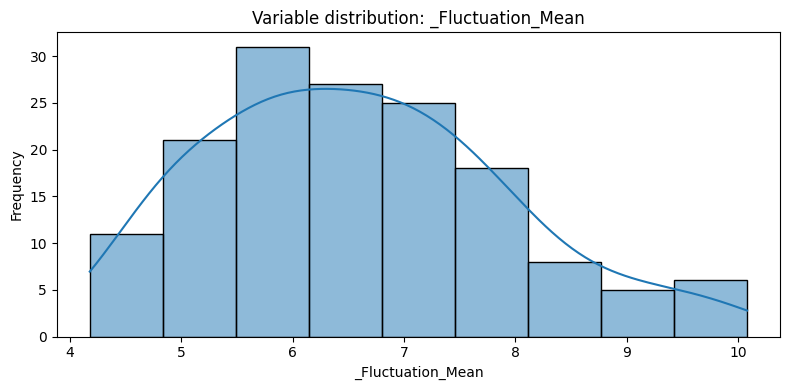

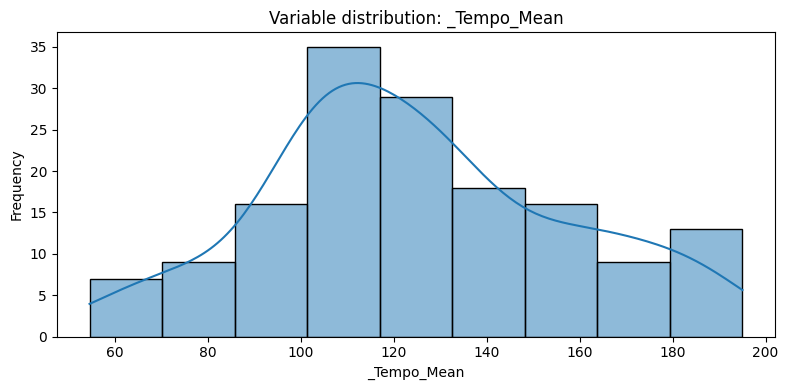

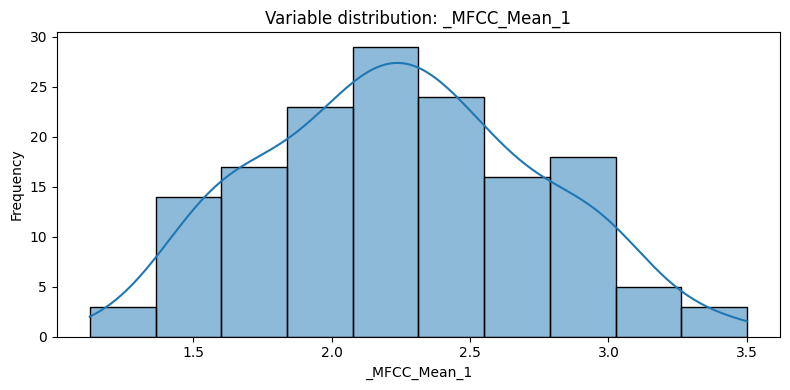

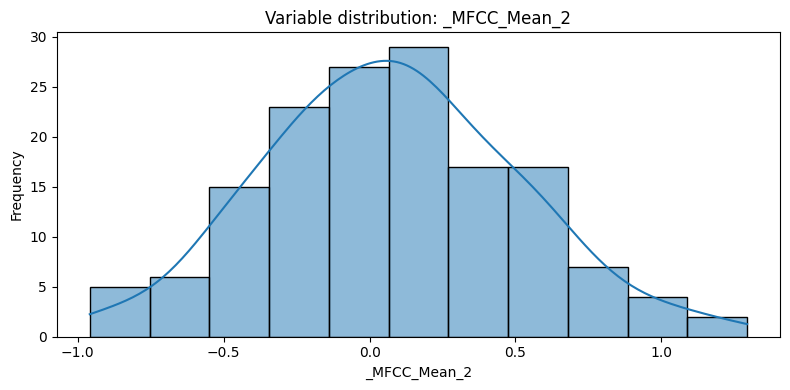

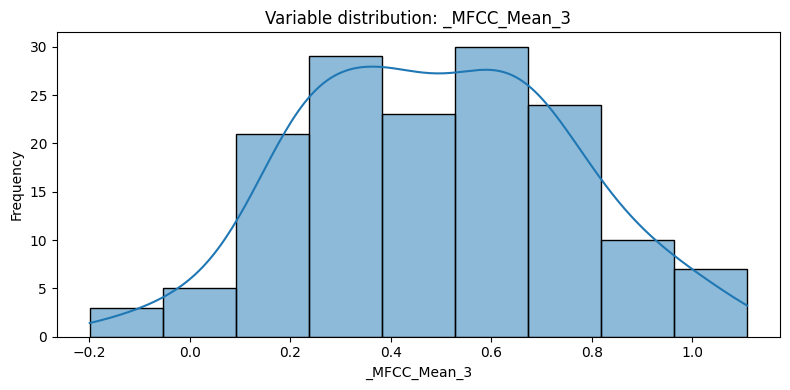

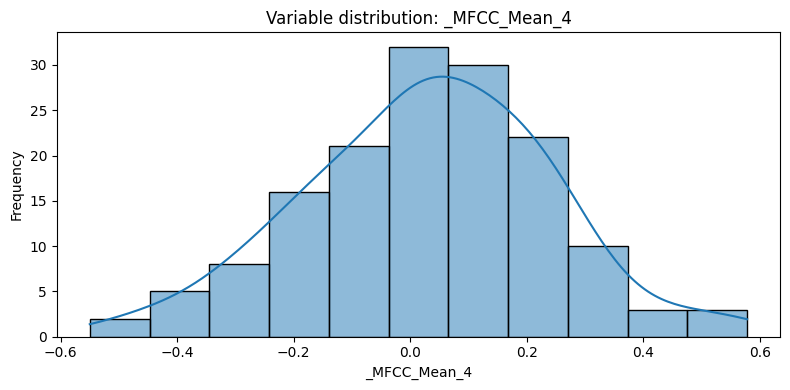

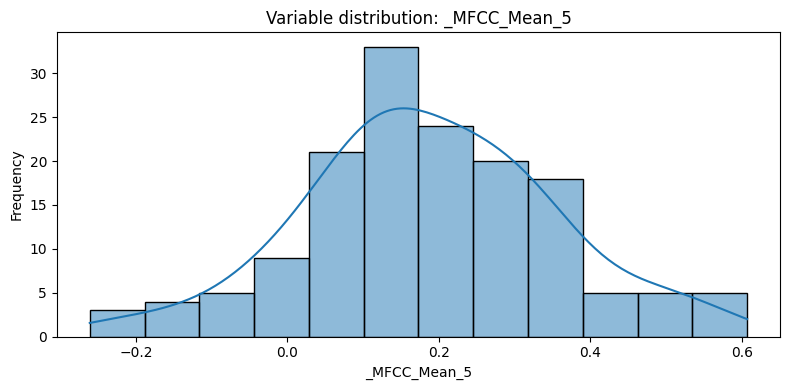

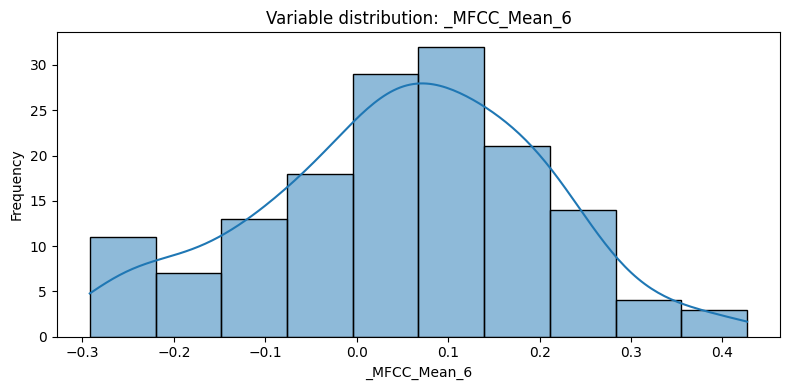

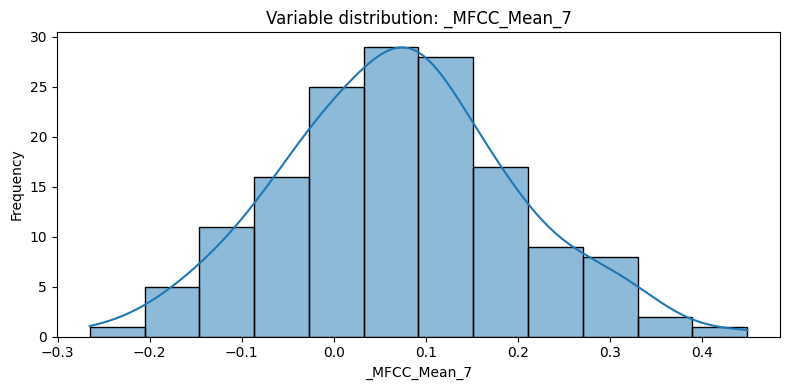

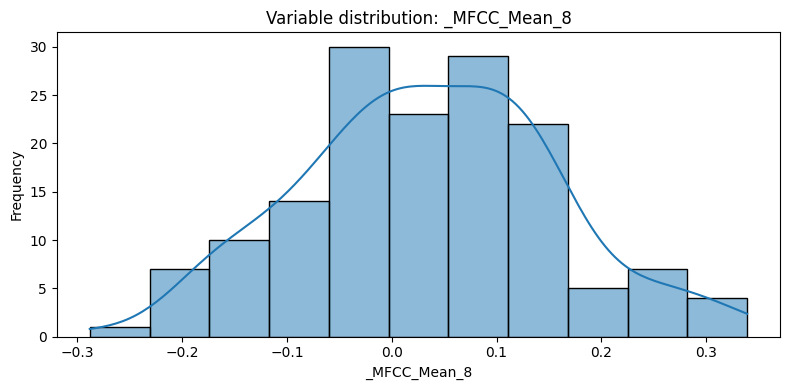

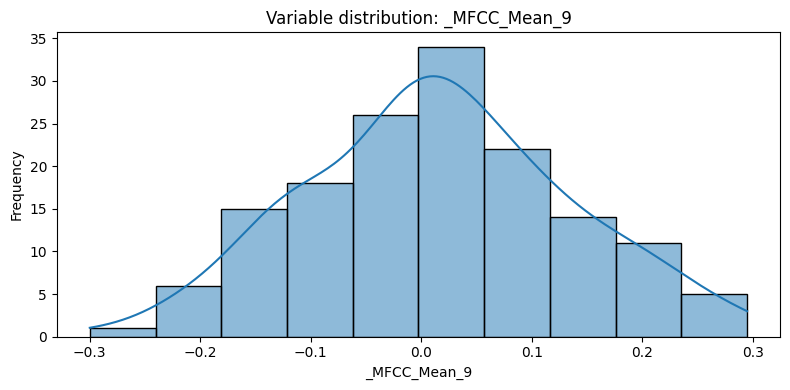

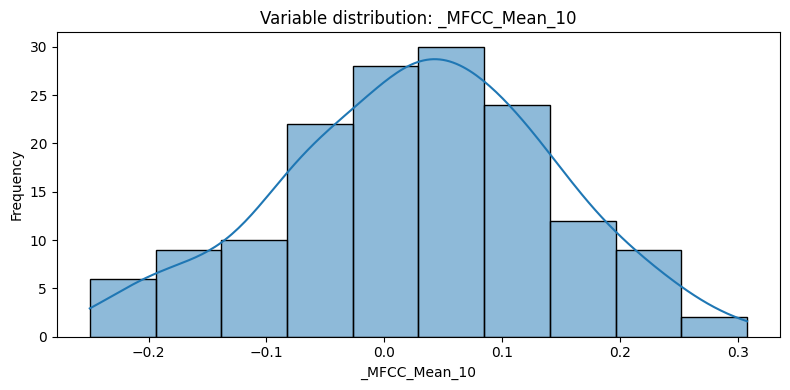

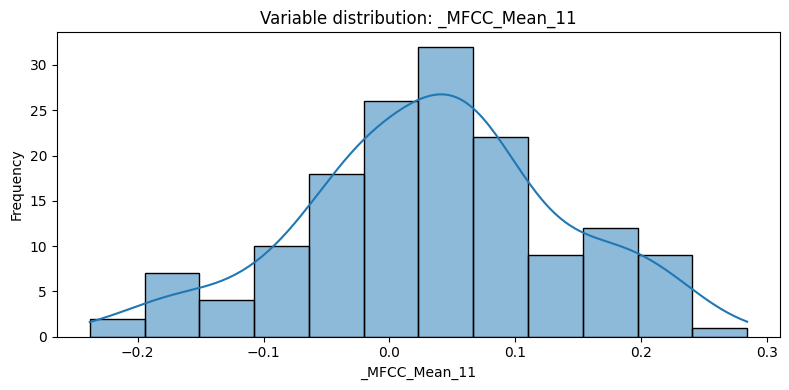

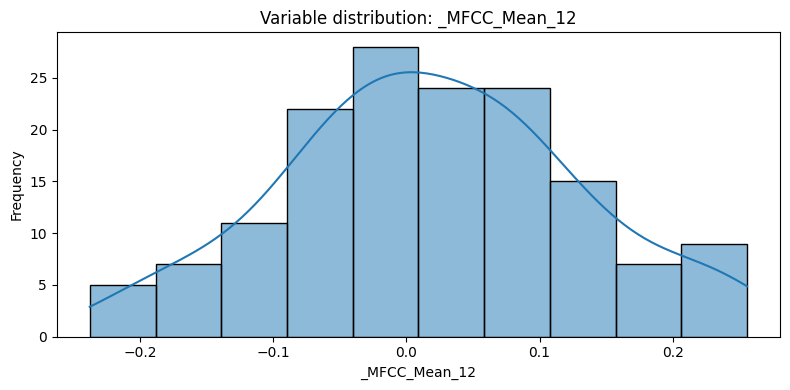

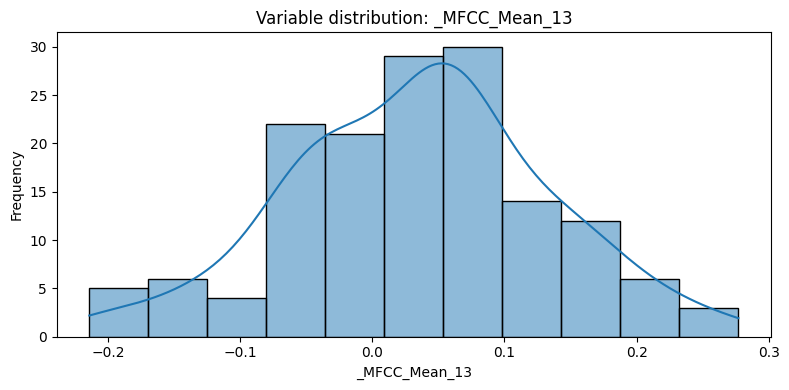

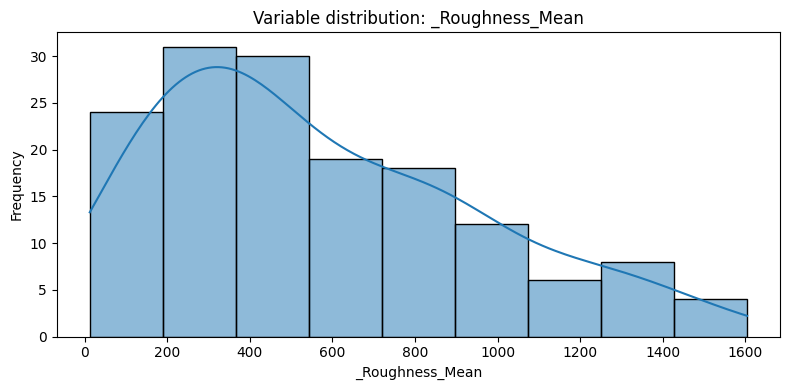

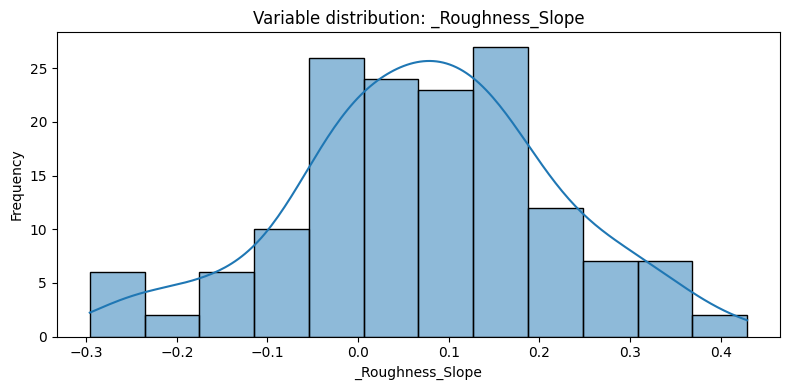

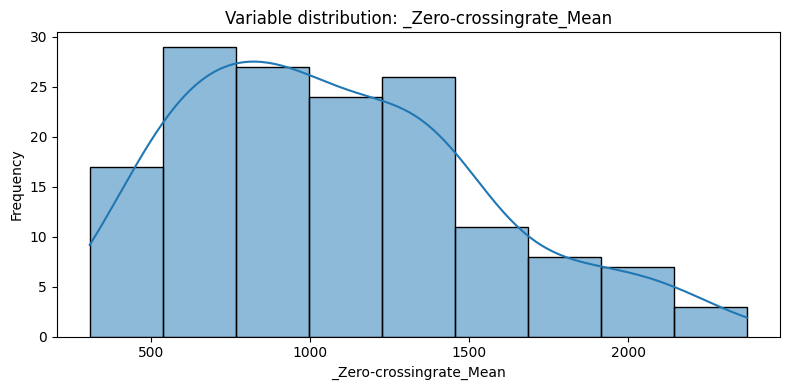

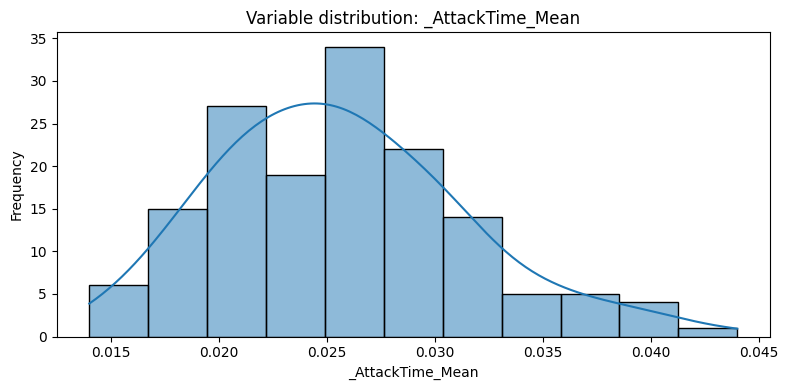

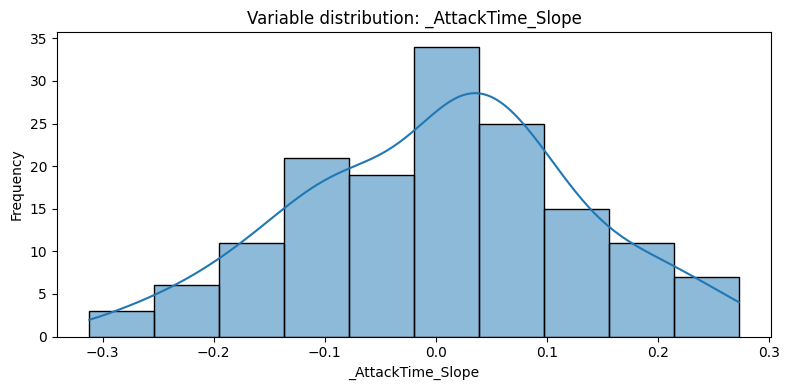

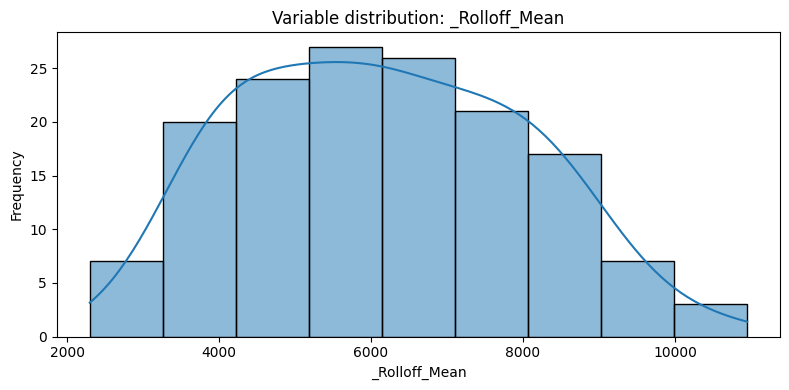

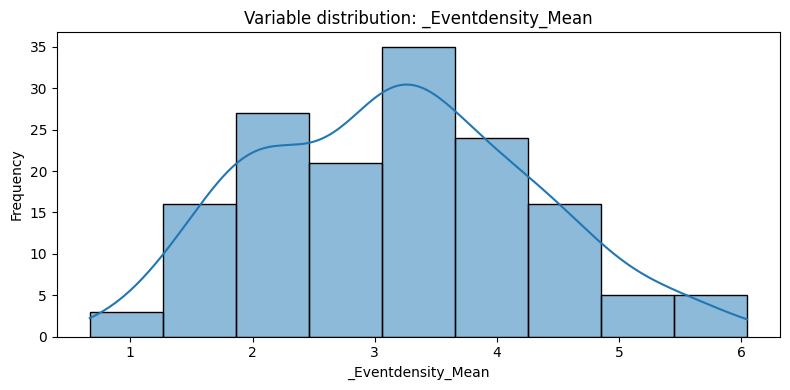

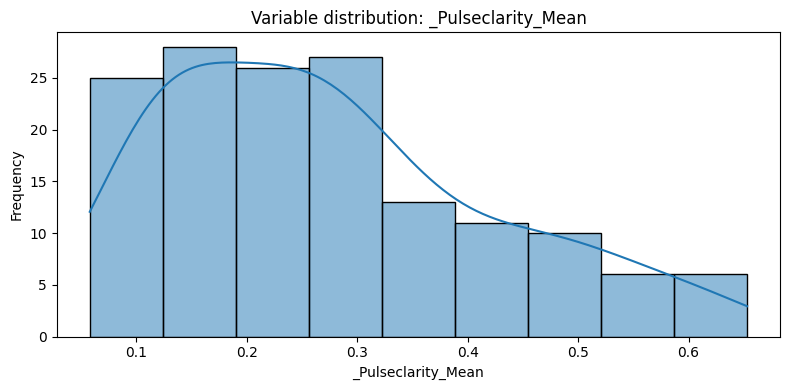

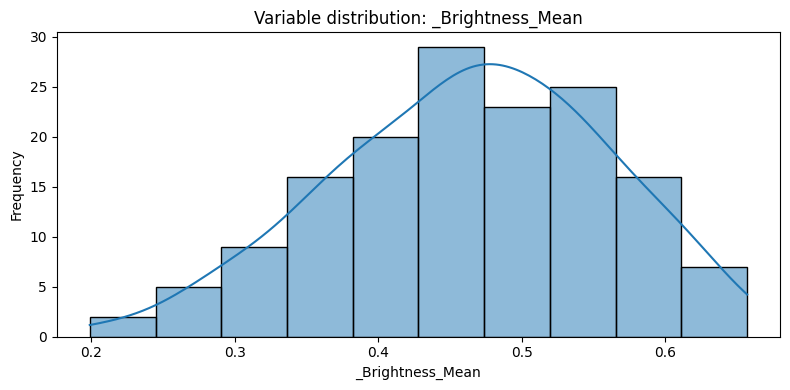

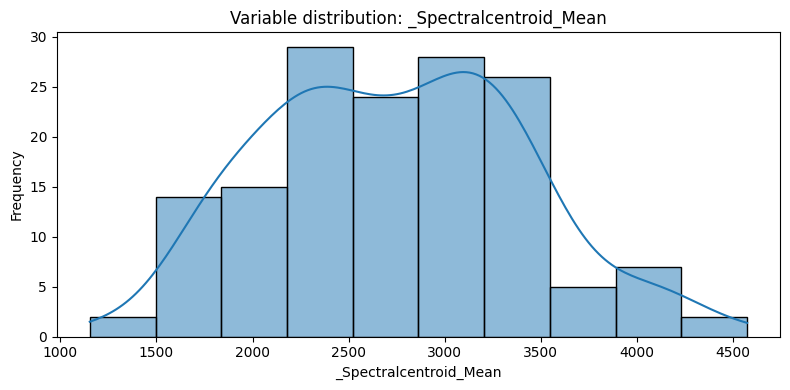

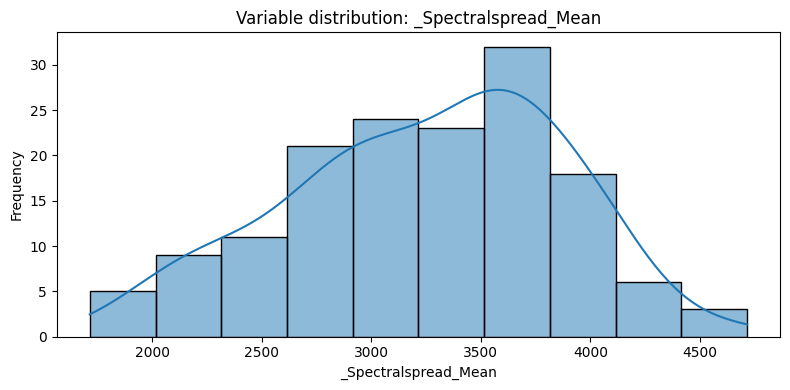

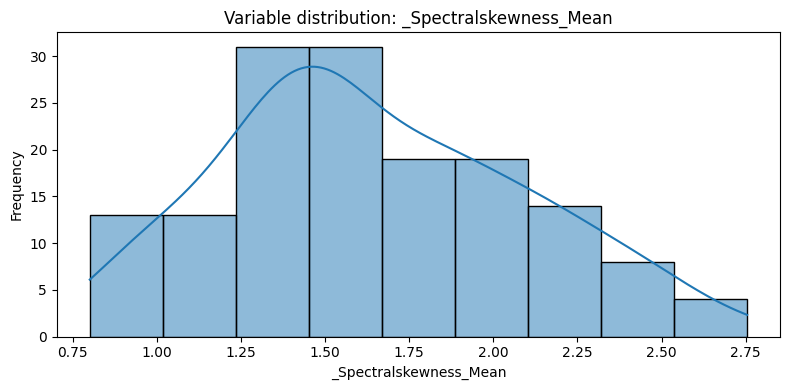

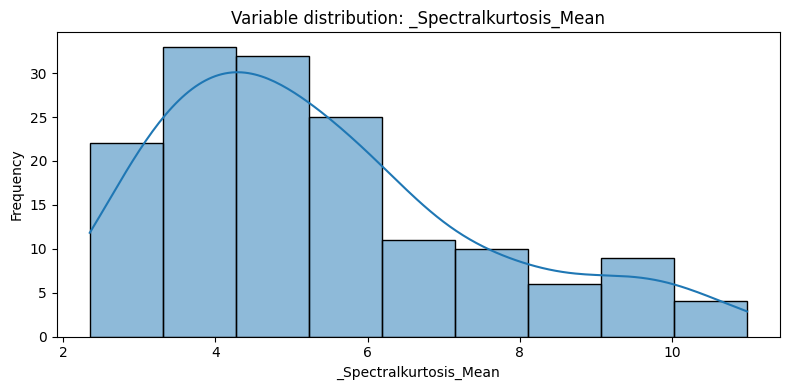

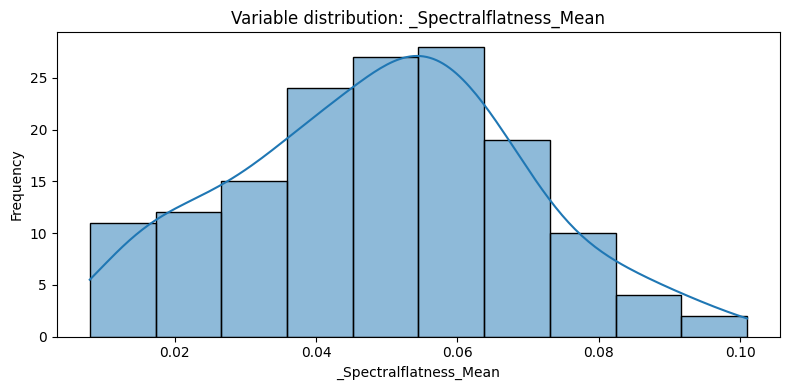

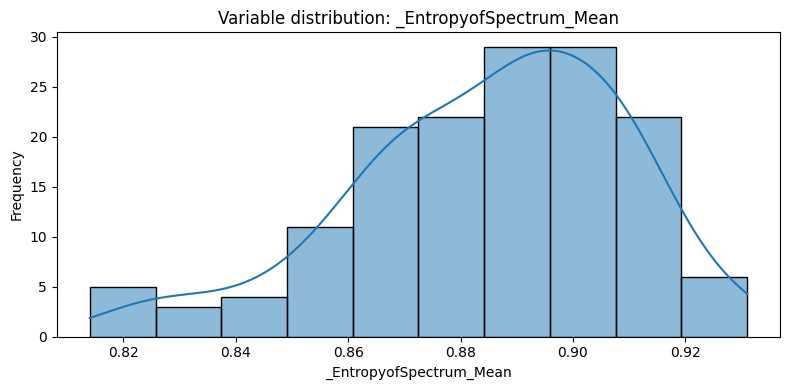

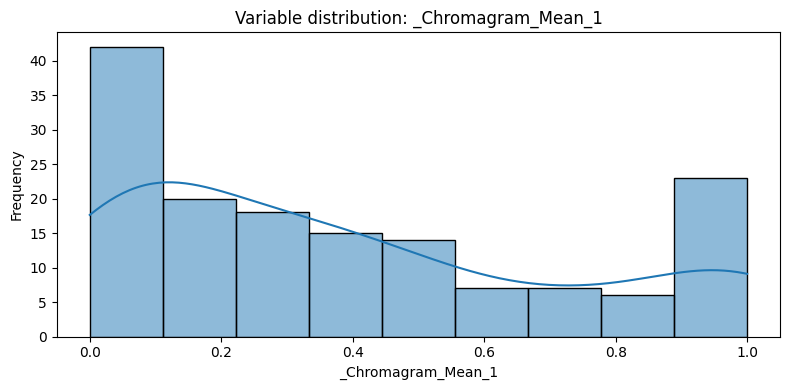

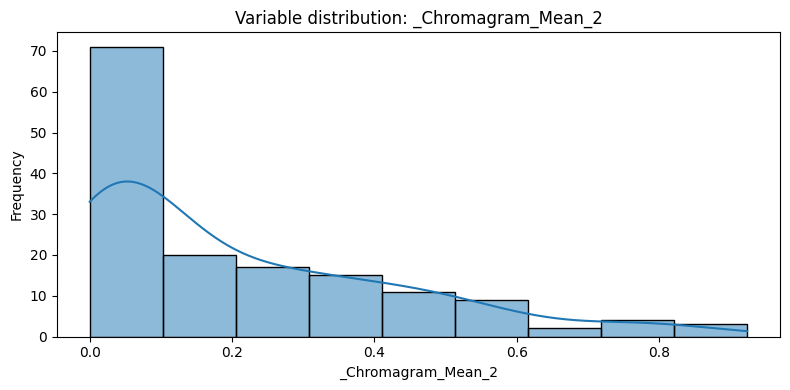

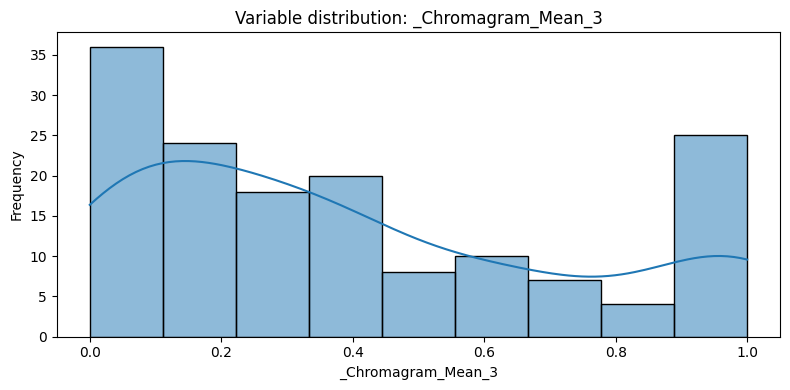

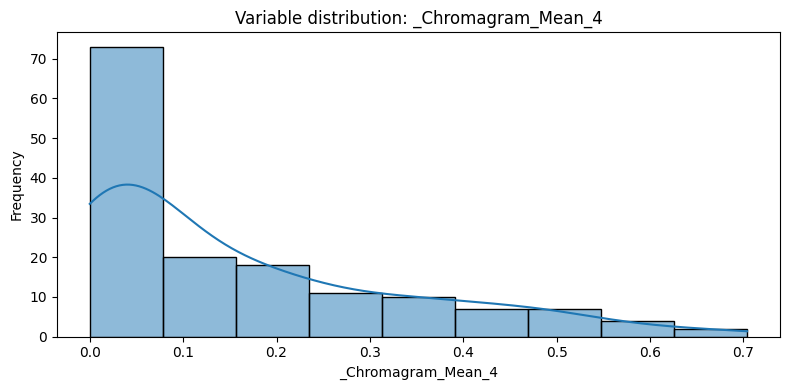

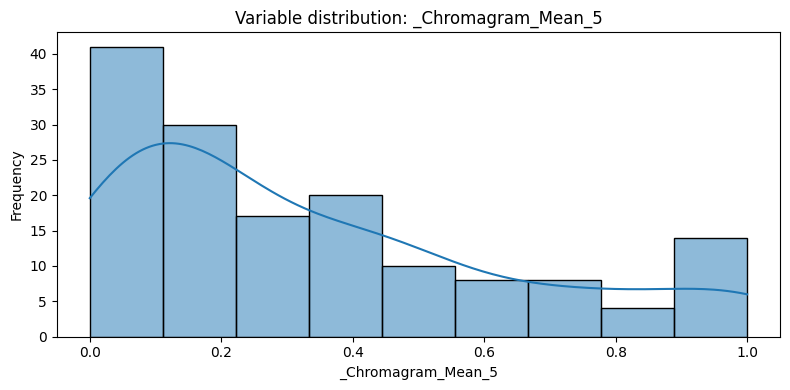

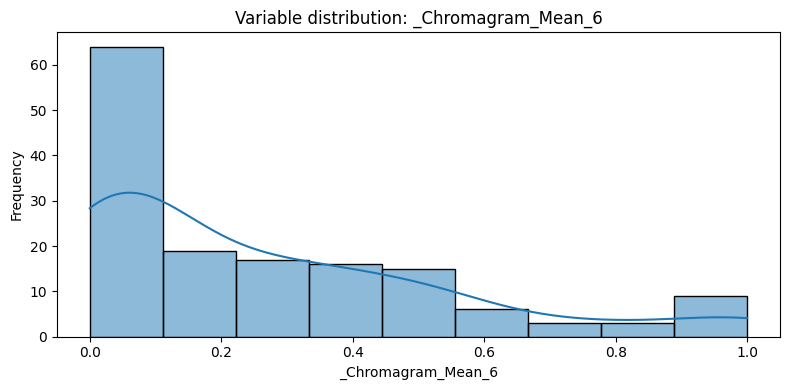

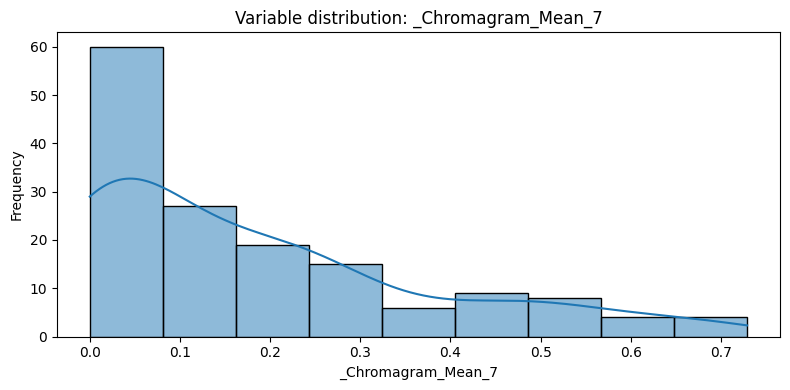

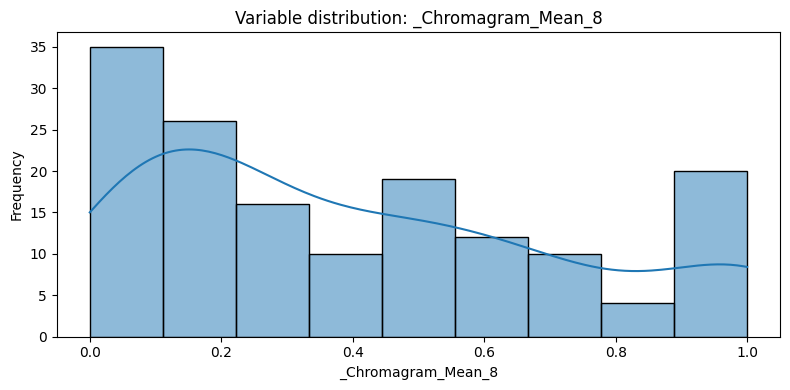

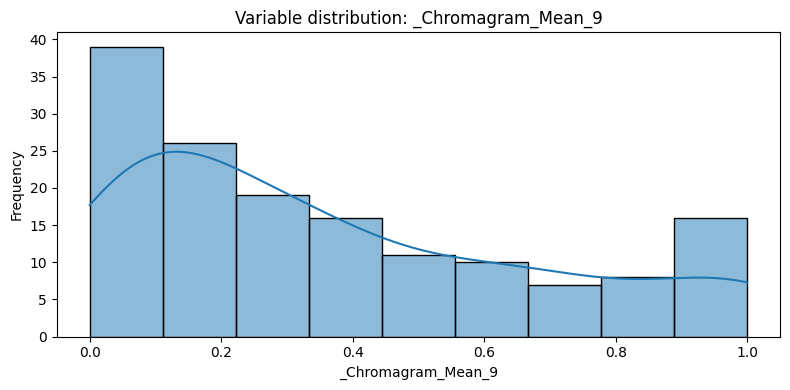

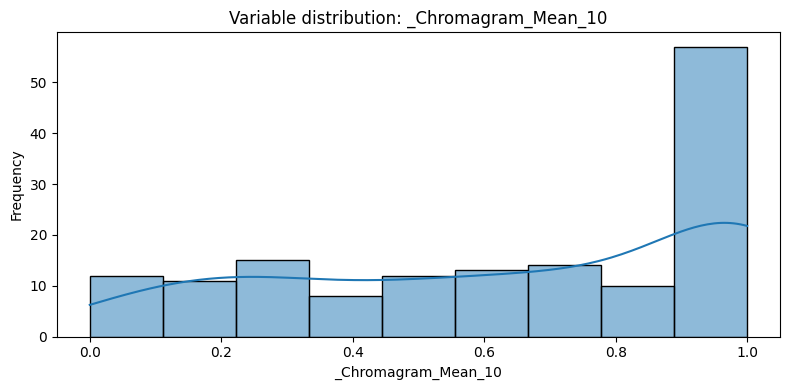

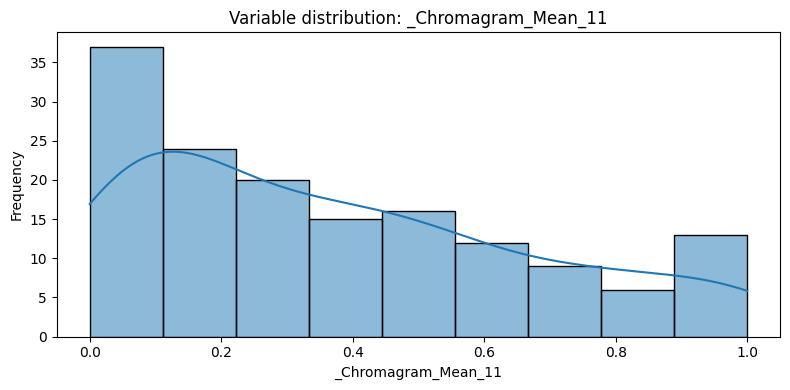

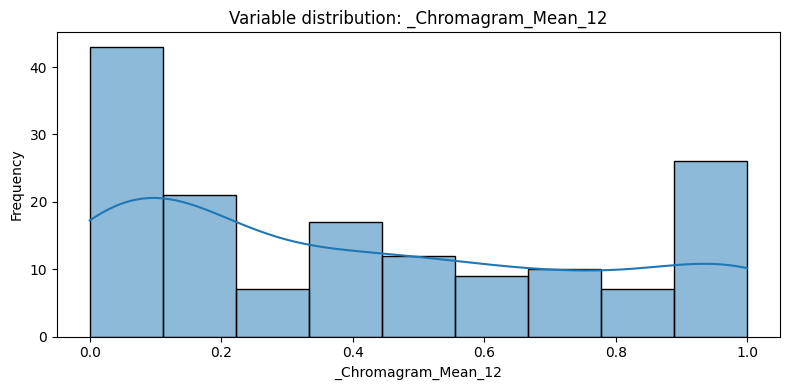

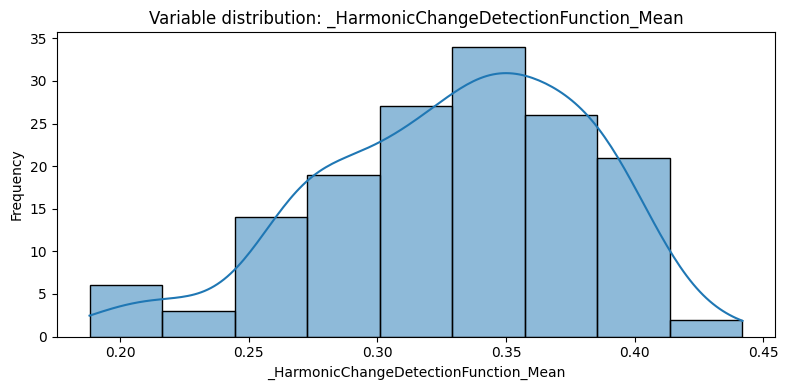

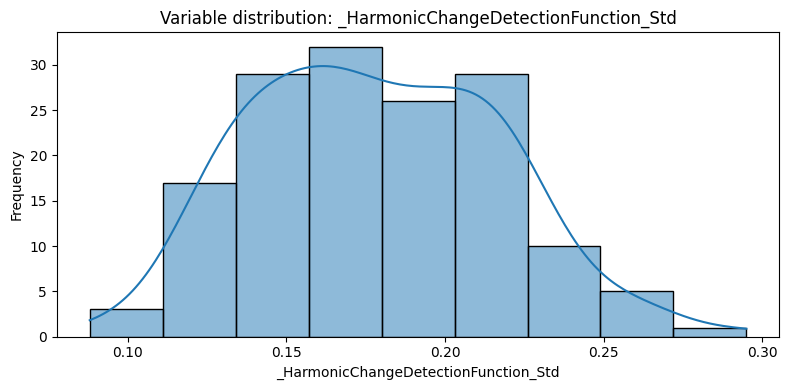

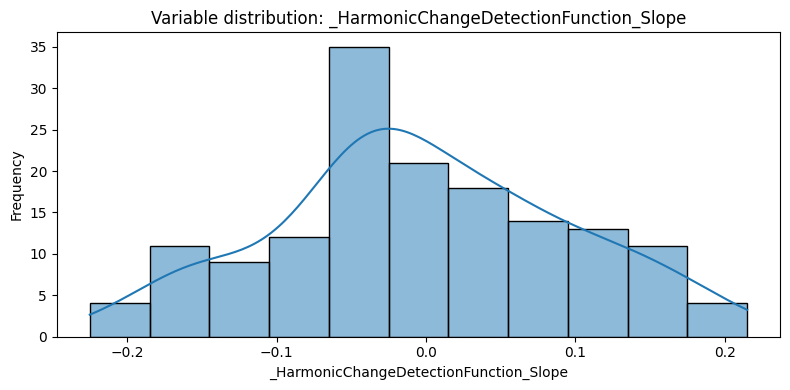

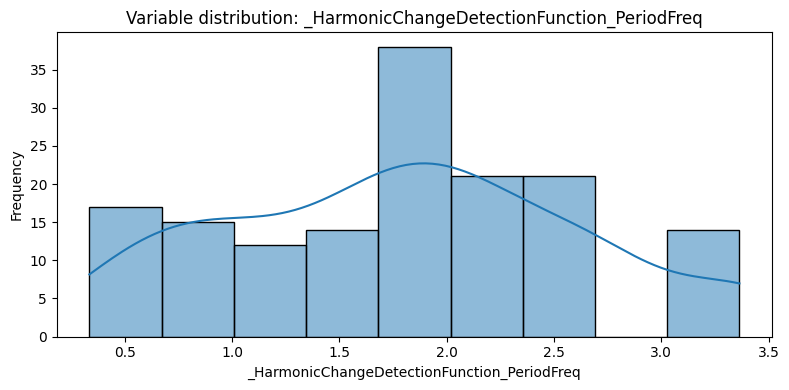

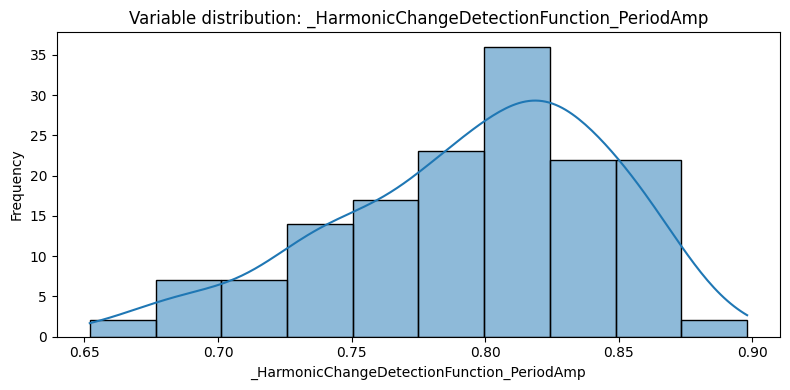

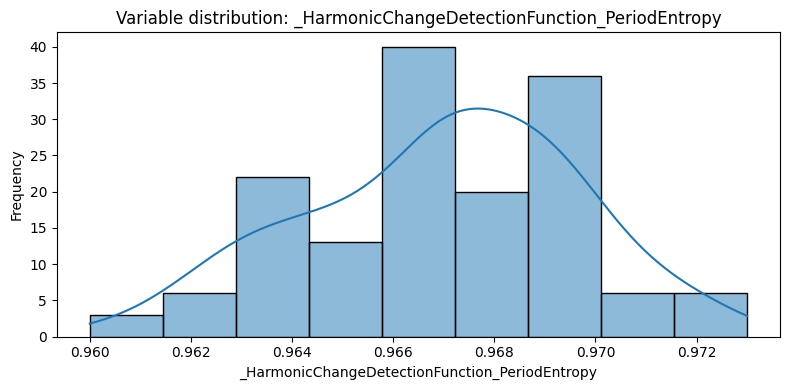

In [119]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Variable distribution: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


## Correlations

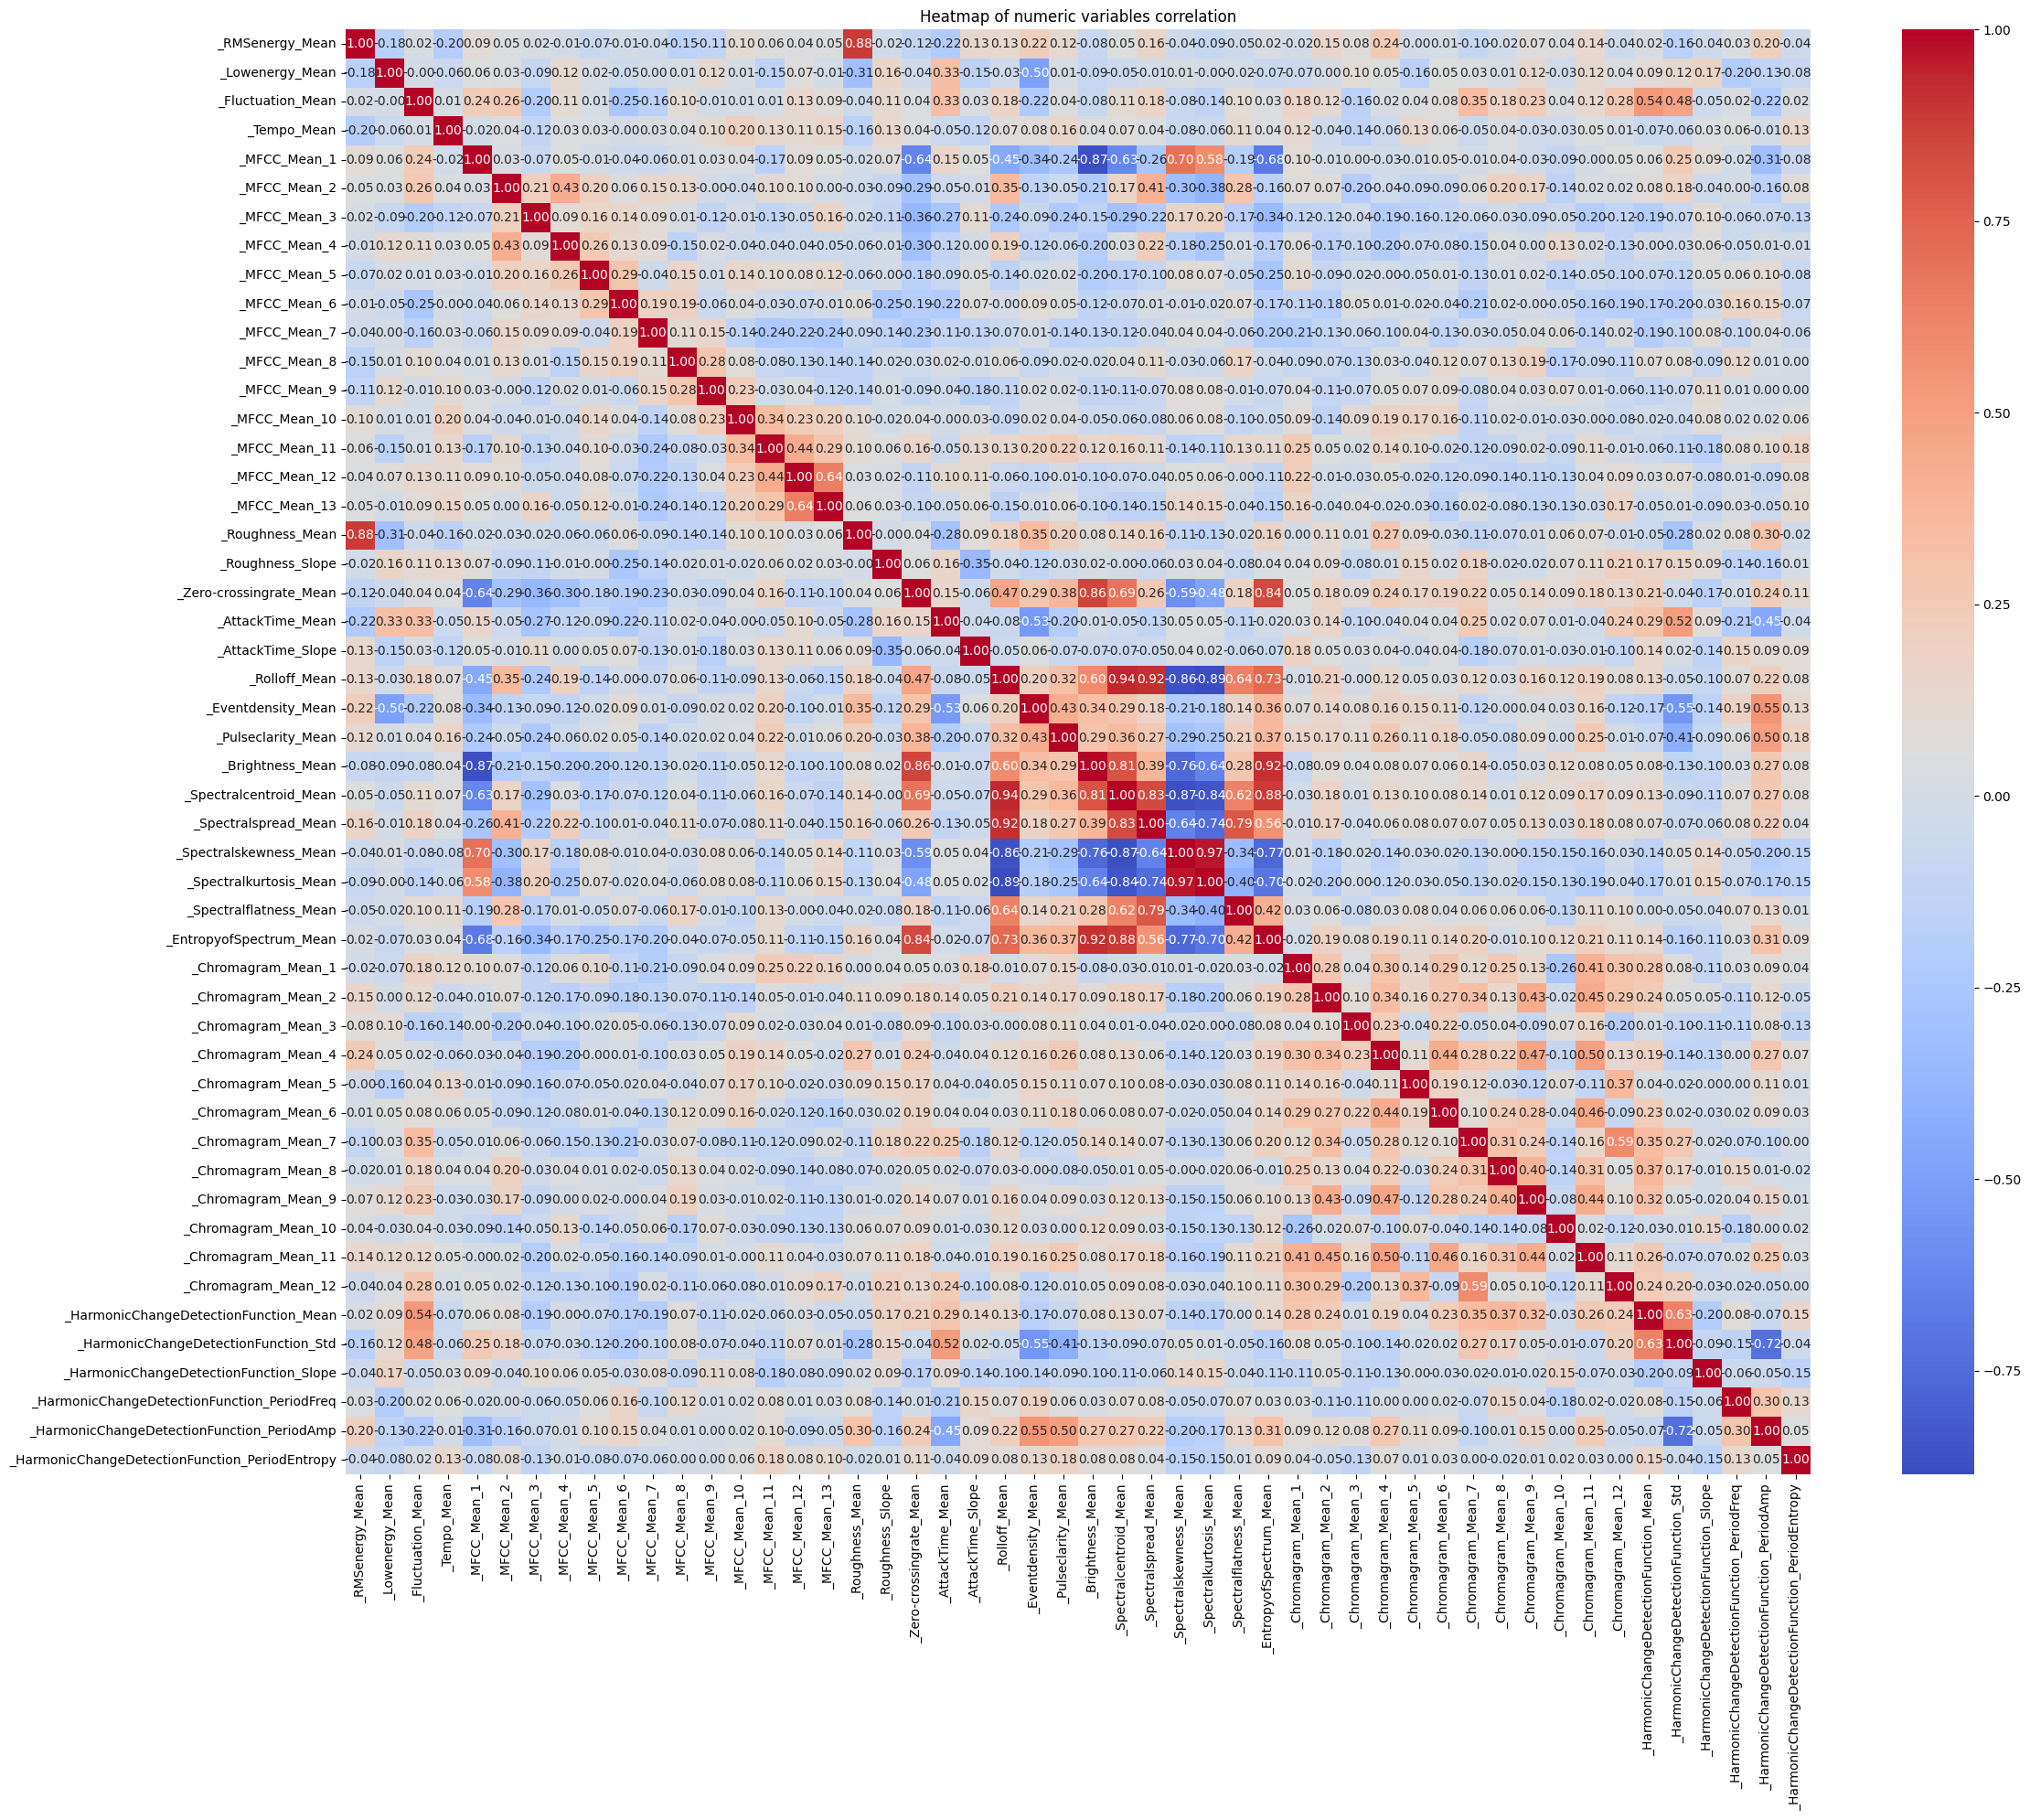

In [120]:
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of numeric variables correlation')
plt.tight_layout()
plt.show()


# **Transformations and data preparation**

## Data normalization

In [121]:
scaler = PowerTransformer(method='yeo-johnson')

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [122]:
df.head()

Class  _RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
15  relax         0.671550         0.895436           1.079591    -2.001373   
16  relax         0.009538        -0.745064           0.490471     1.010864   
17  relax        -0.228621         0.457259           0.485601    -1.511469   
23  relax        -0.265526        -0.109331          -0.414935    -1.748101   
28  relax         0.794249         1.061204           1.533347    -0.597765   

    _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  ...  \
15     -0.052637      0.951989      1.622710      1.140017      2.140098  ...   
16     -0.690802      1.382068      1.240743      1.362885      1.405832  ...   
17      0.699378      0.760034      0.327033      1.547231      0.197879  ...   
23     -1.135894      1.534186      2.153592     -0.580108     -0.181011  ...   
28      0.109064      1.300214      0.424991     -0.126134      0.945933  ...   

    _Chromagram_Mean_9  _Chromagram_Mean_10  _Chromagram_Mean_11  \
15           -0.879601             1.117071            -1.554711   
16           -0.896495             0.196539            -1.502997   
17            0.054708            -0.382318            -0.246876   
23           -0.140684             1.117071            -0.973049   
28            1.605940            -0.511776             0.869952   

    _Chromagram_Mean_12  _HarmonicChangeDetectionFunction_Mean  \
15            -1.189938                              -0.716953   
16             0.728464                               0.635600   
17             1.438951                               1.516756   
23             1.058018                               0.173746   
28            -0.057919                               1.336127   

    _HarmonicChangeDetectionFunction_Std  \
15                              0.397233   
16                              1.280820   
17                              1.120022   
23                              1.280820   
28                              0.570934   

    _HarmonicChangeDetectionFunction_Slope  \
15                                2.011488   
16                               -1.654401   
17                               -1.360248   
23                                1.340816   
28                                0.886631   

    _HarmonicChangeDetectionFunction_PeriodFreq  \
15                                    -1.572311   
16                                     1.049265   
17                                     0.186686   
23                                    -1.100173   
28                                     0.555334   

    _HarmonicChangeDetectionFunction_PeriodAmp  \
15                                   -1.108687   
16                                   -0.832812   
17                                   -0.438369   
23                                   -0.899903   
28                                   -0.263926   

    _HarmonicChangeDetectionFunction_PeriodEntropy  
15                                       -0.409430  
16                                       -0.041494  
17                                       -0.041494  
23                                       -0.409430  
28                                        0.341485  

[5 rows x 51 columns]

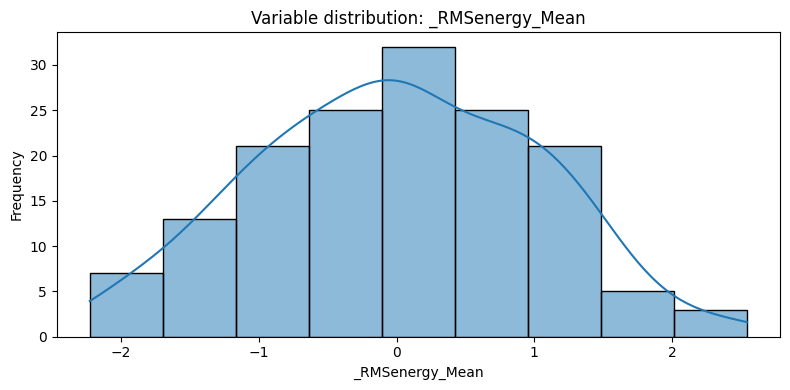

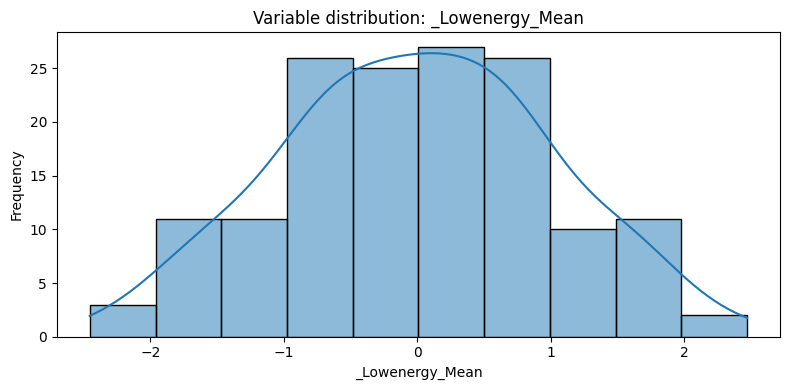

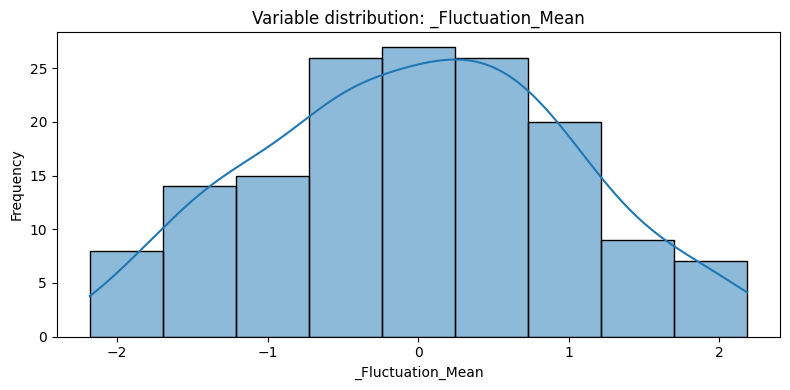

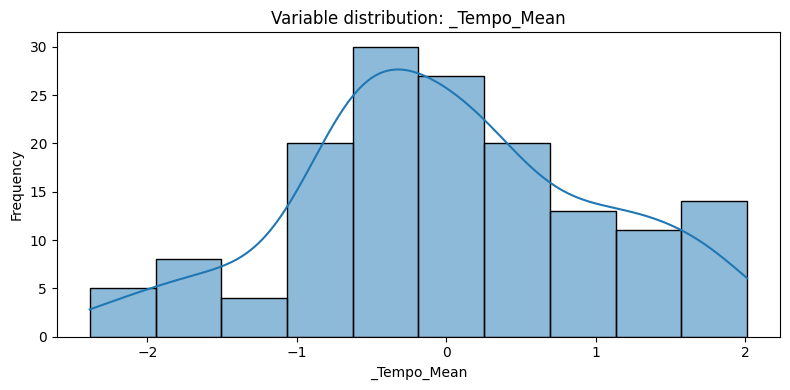

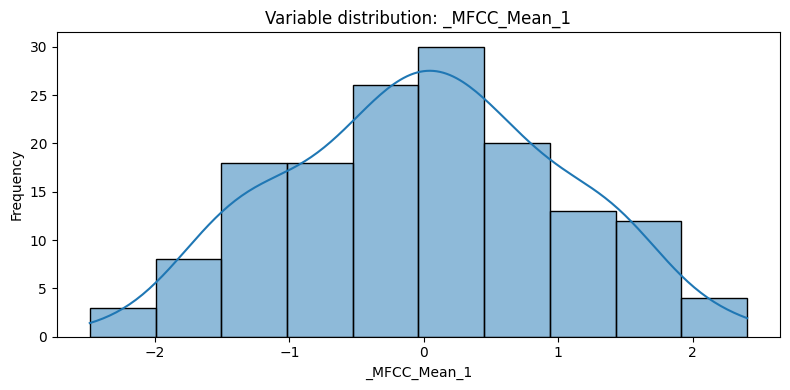

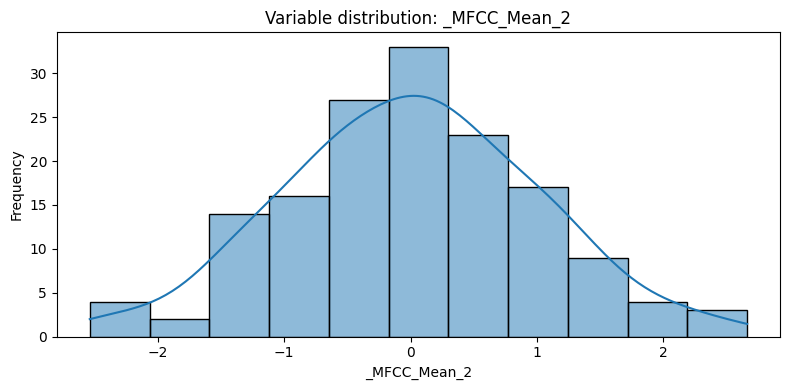

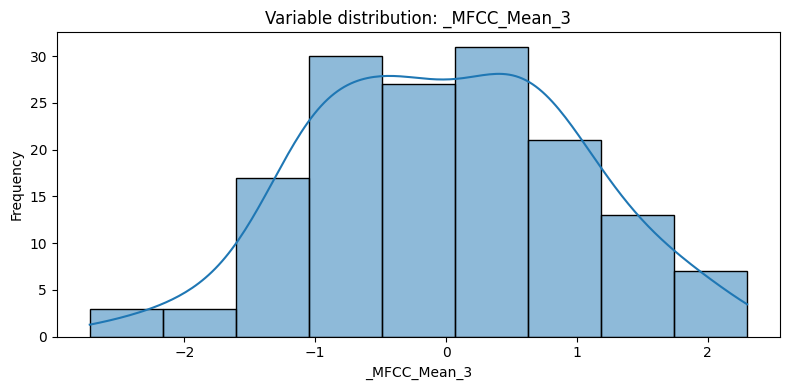

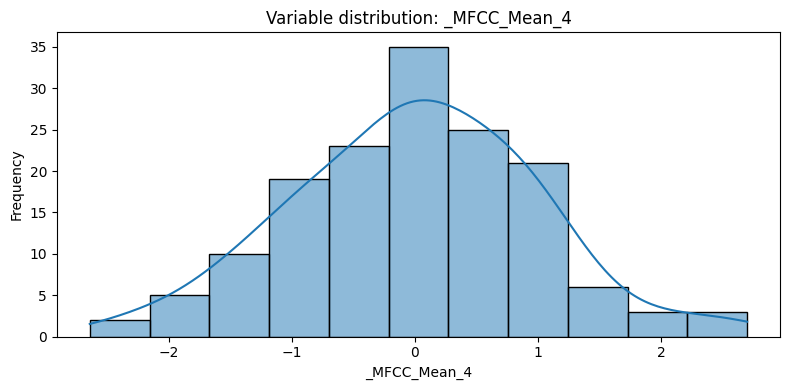

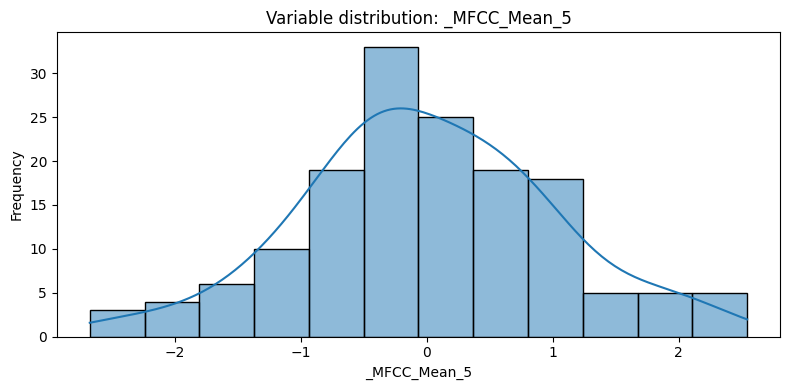

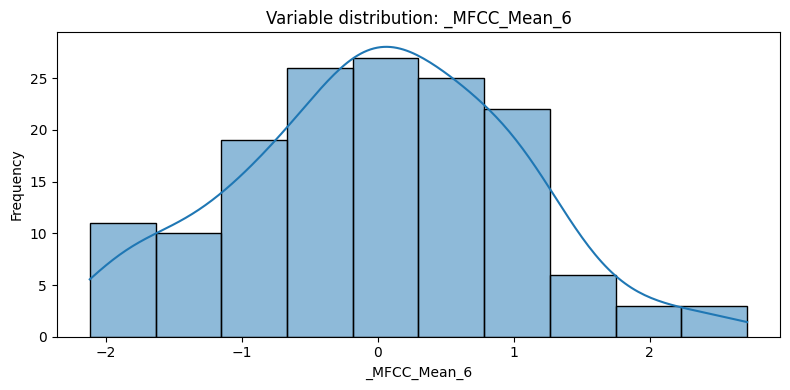

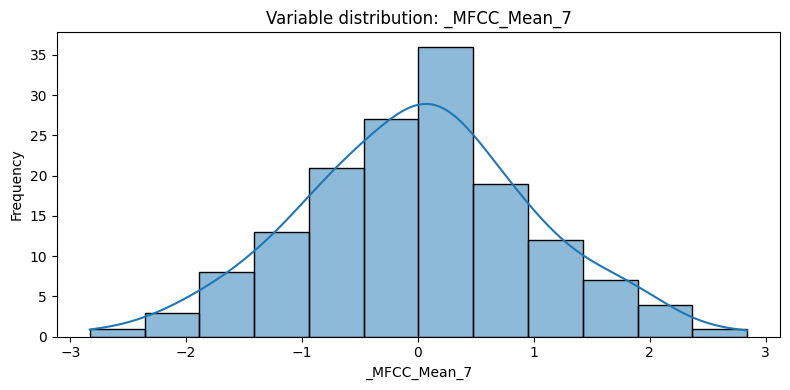

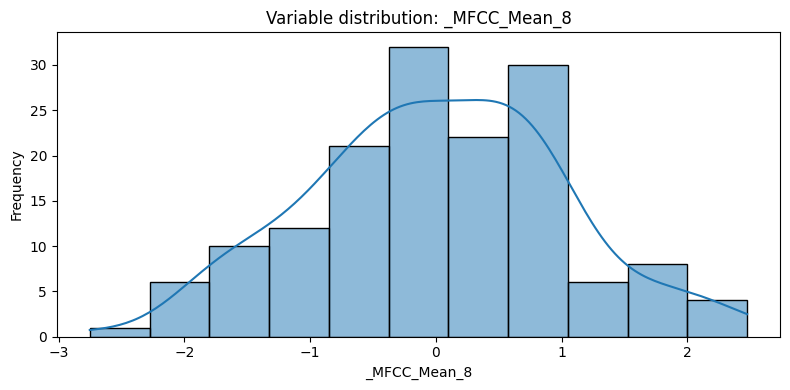

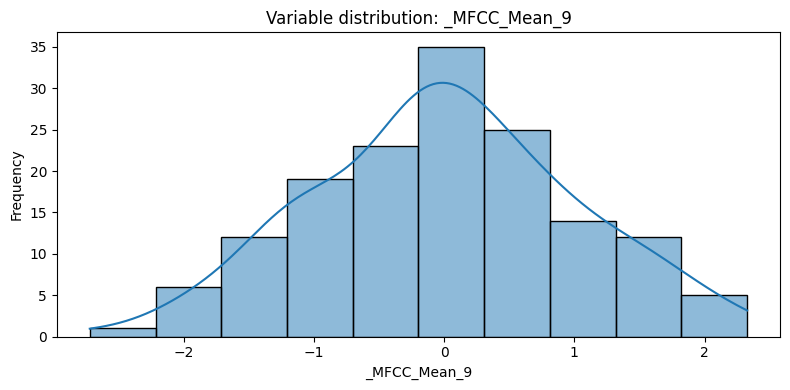

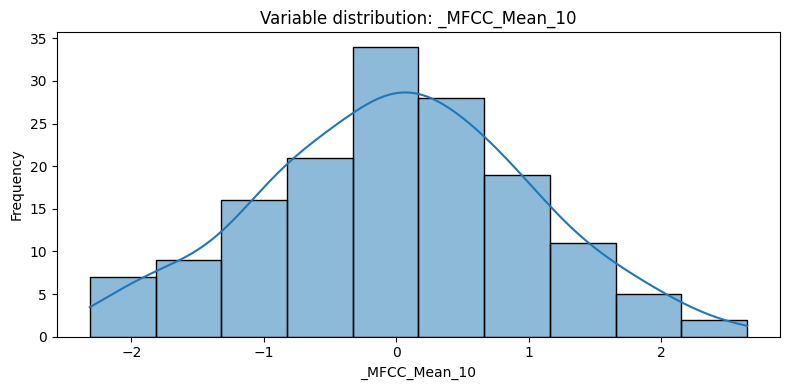

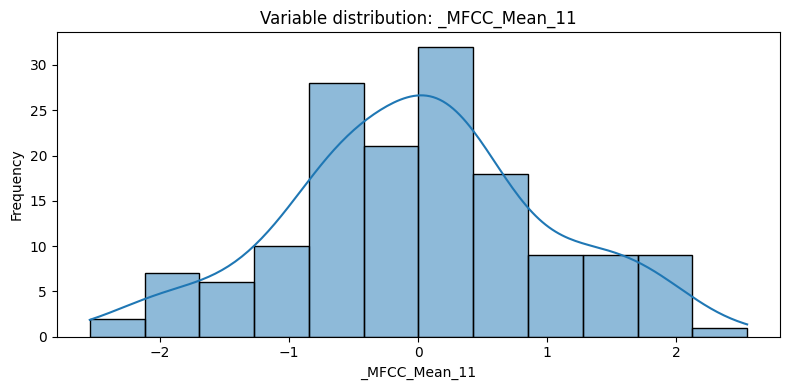

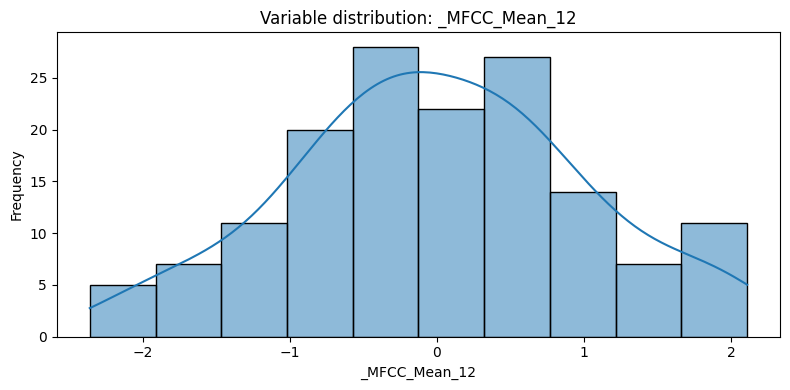

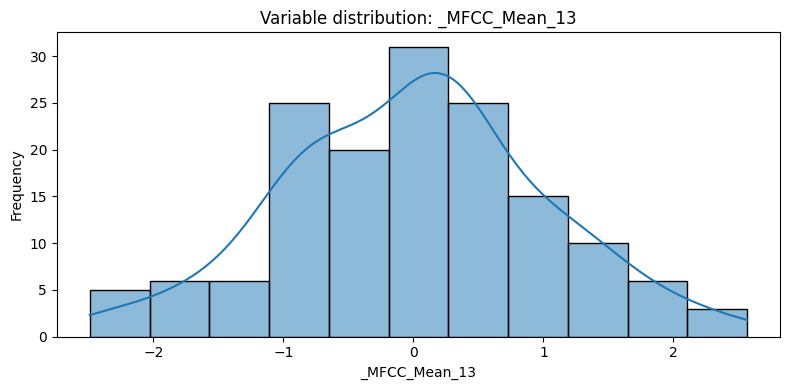

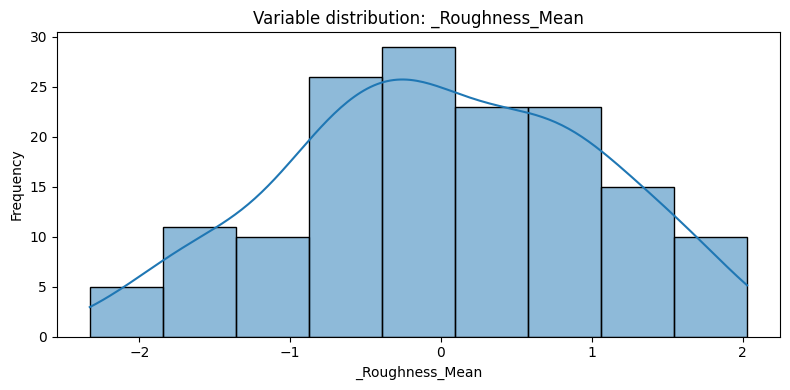

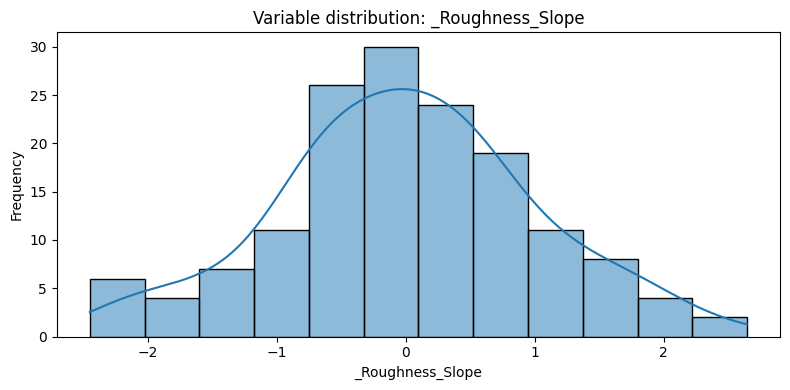

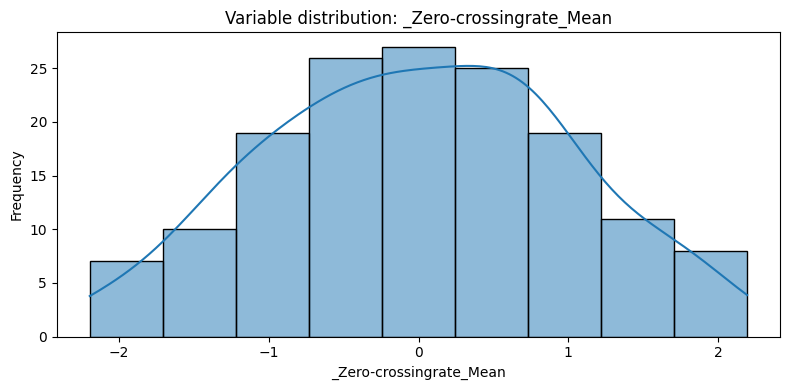

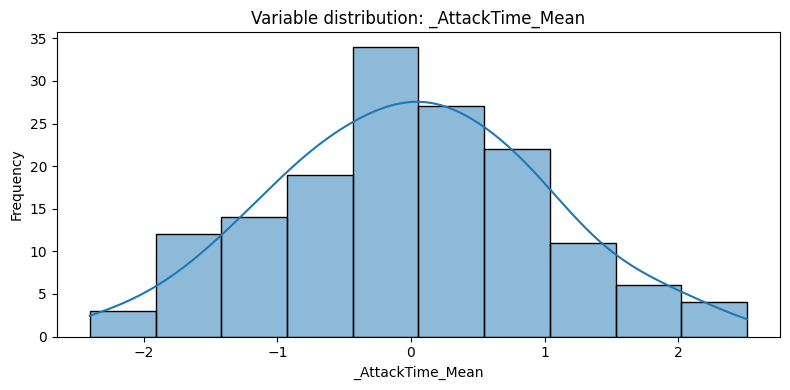

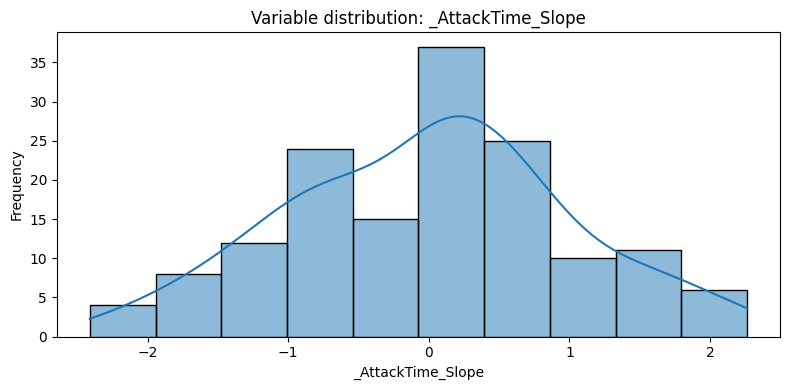

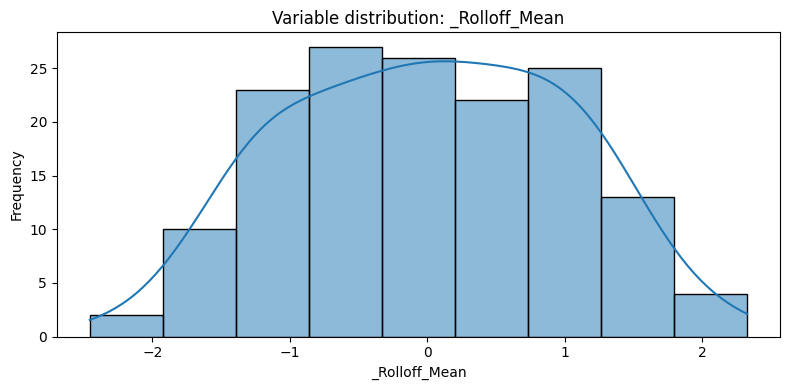

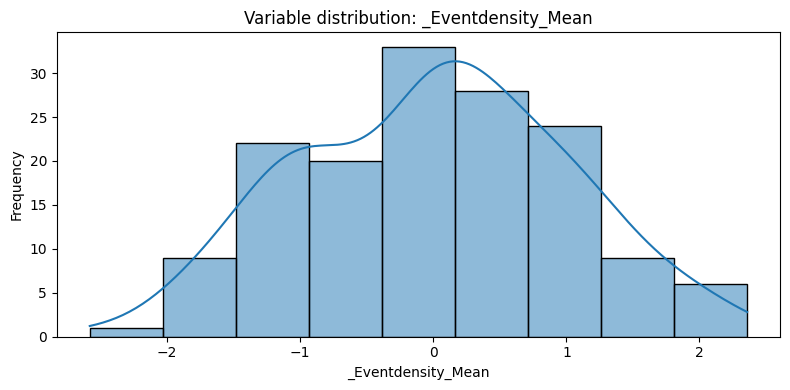

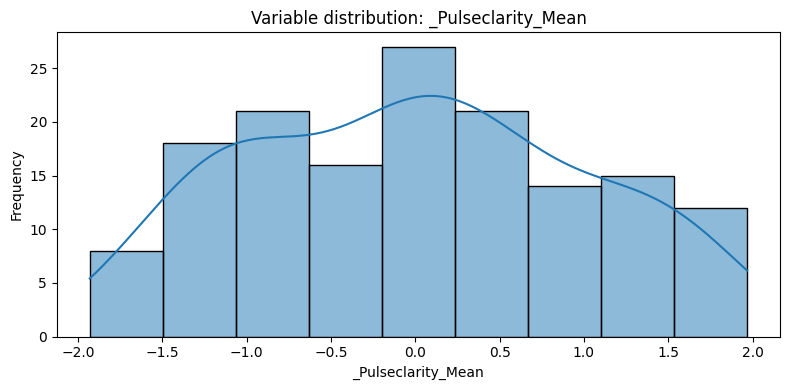

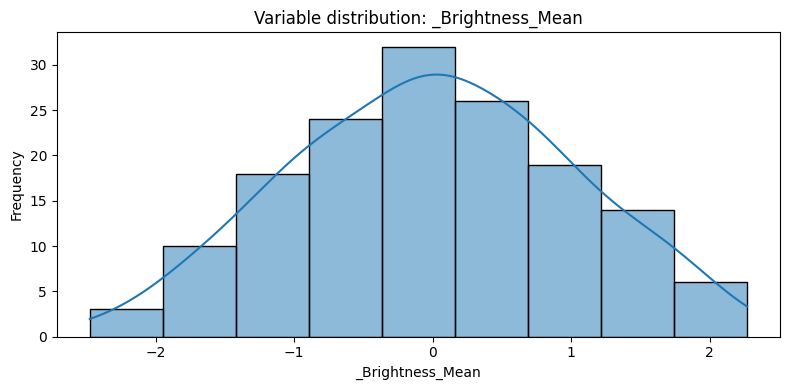

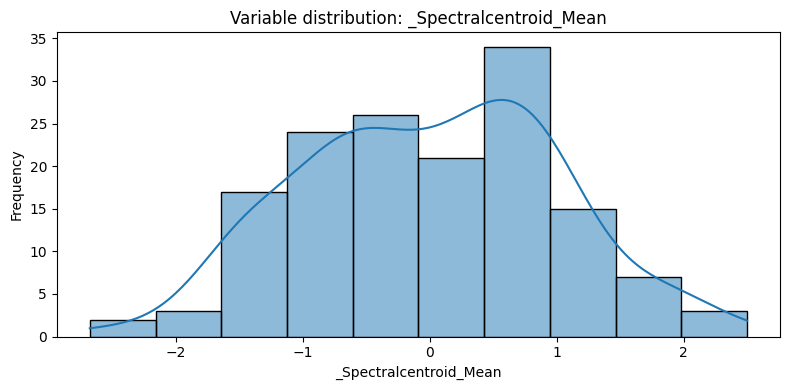

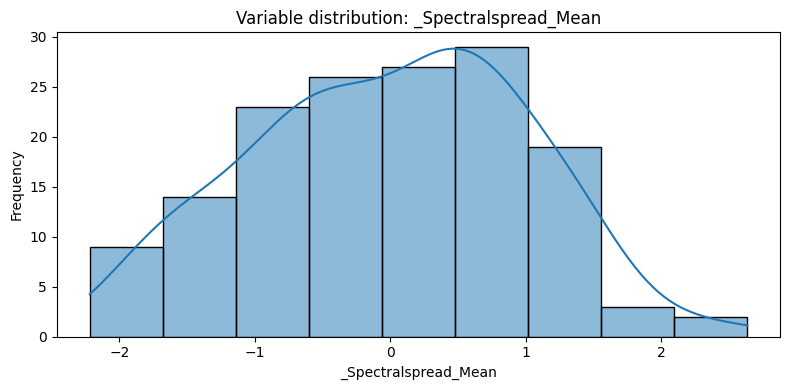

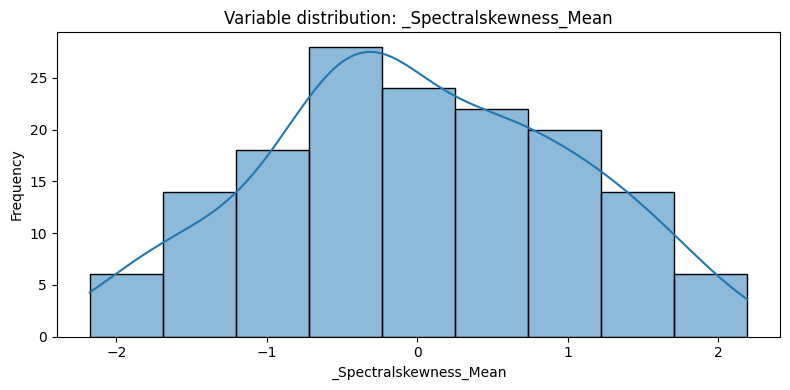

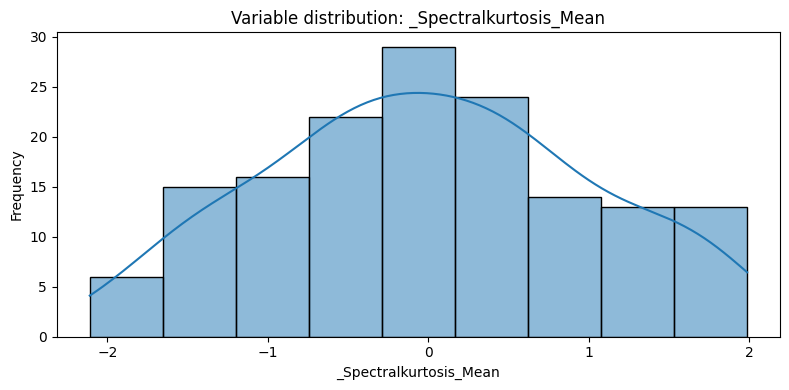

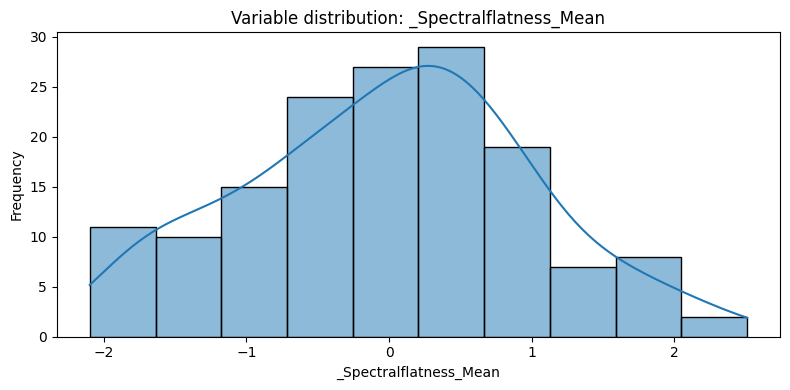

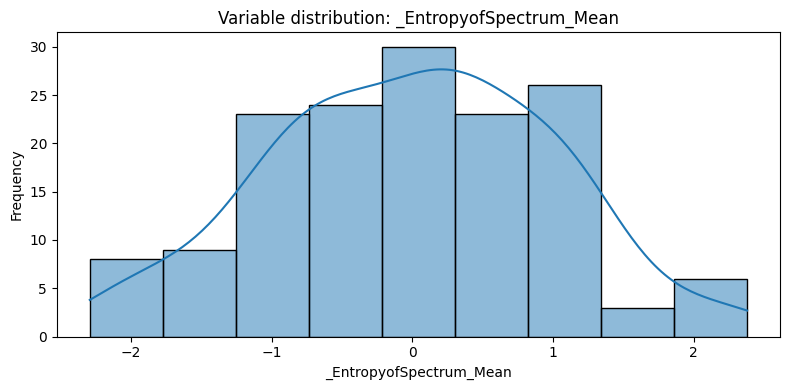

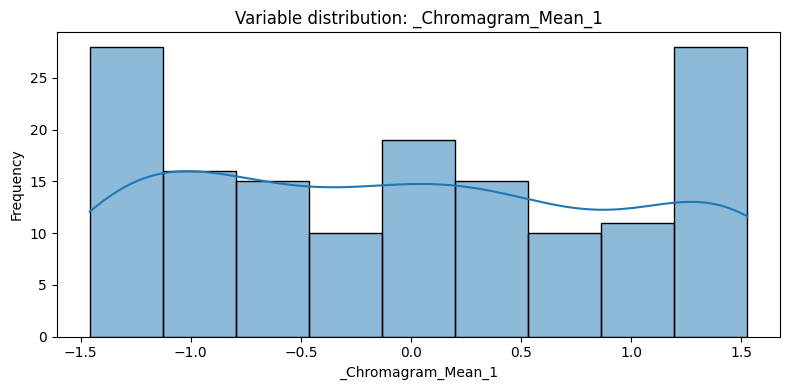

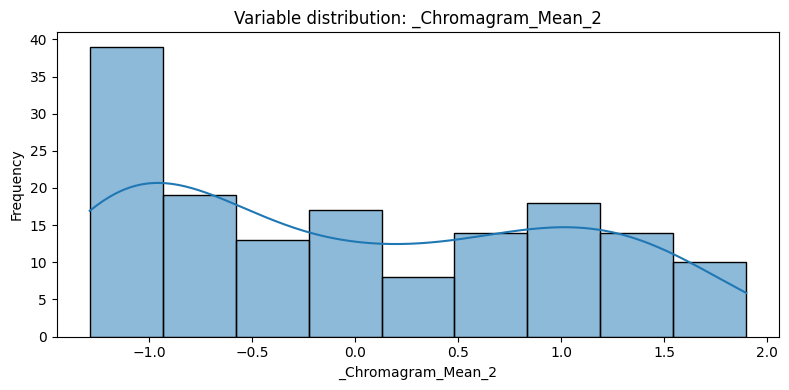

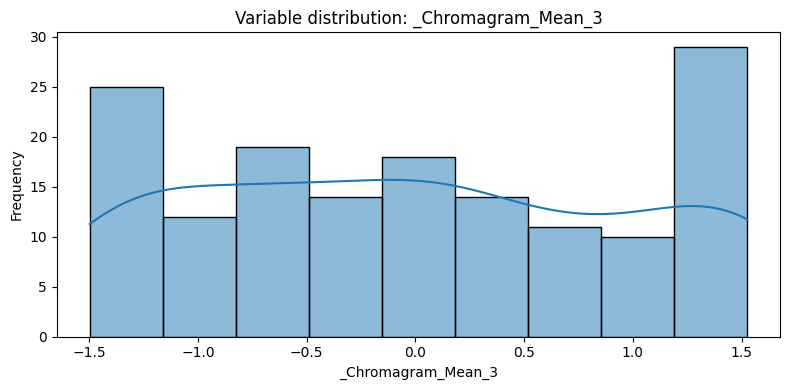

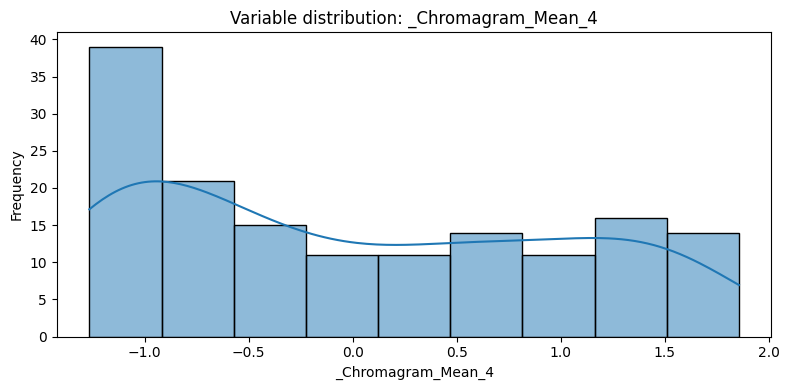

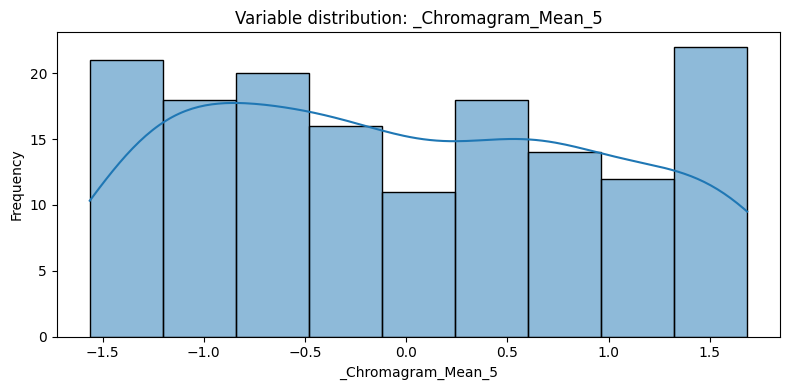

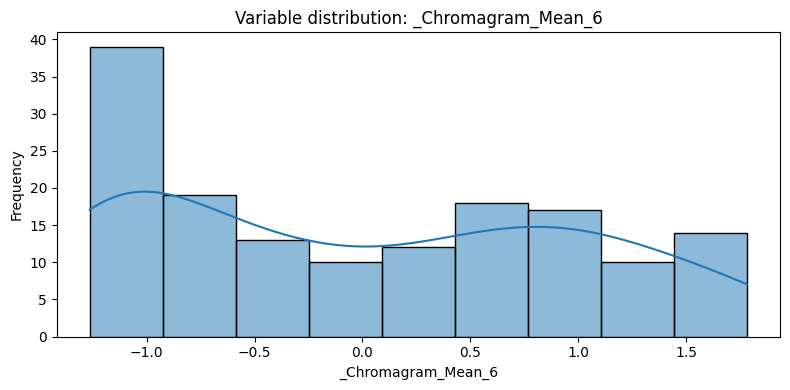

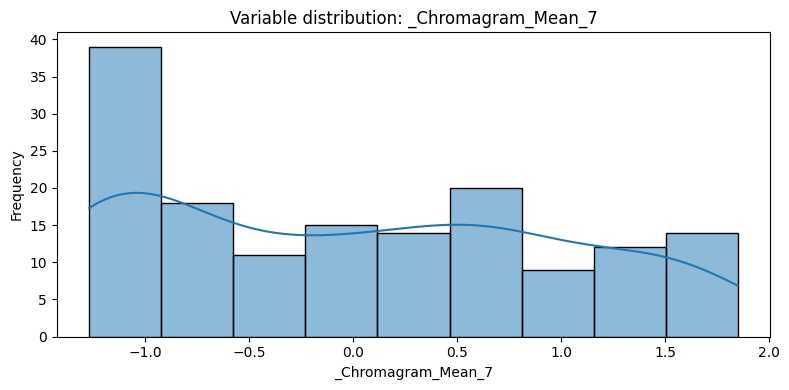

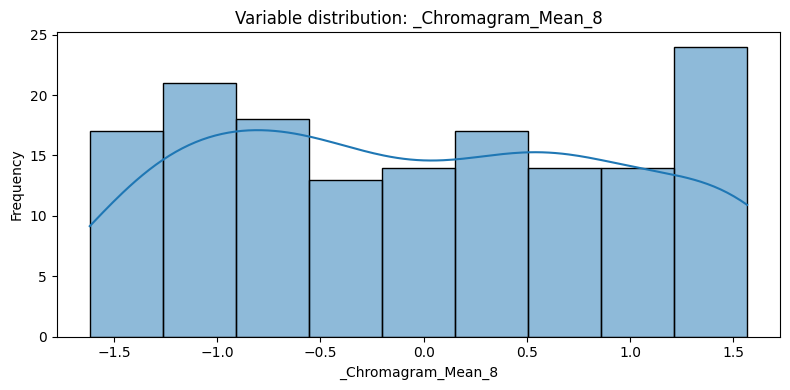

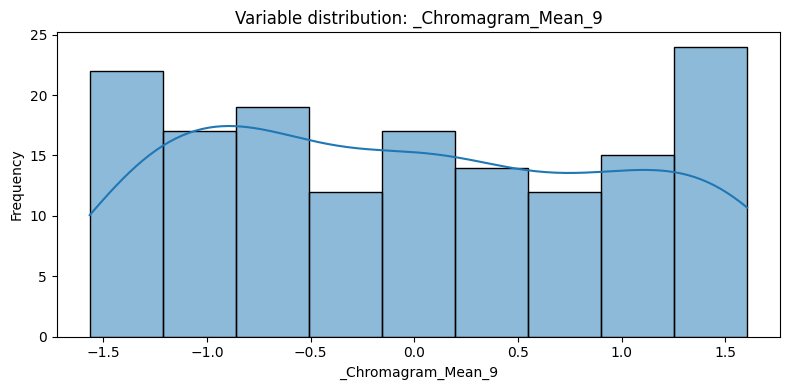

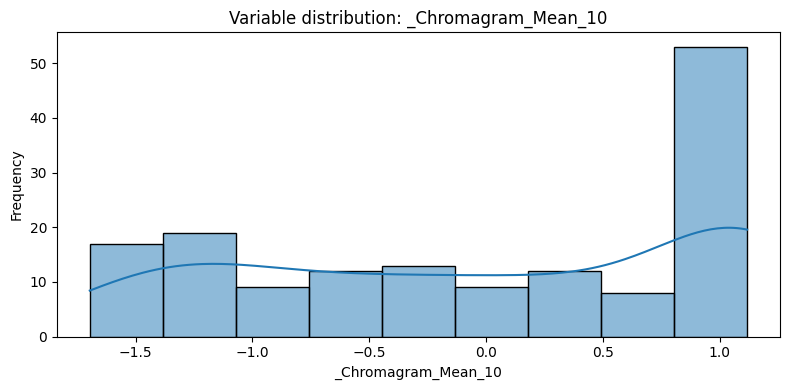

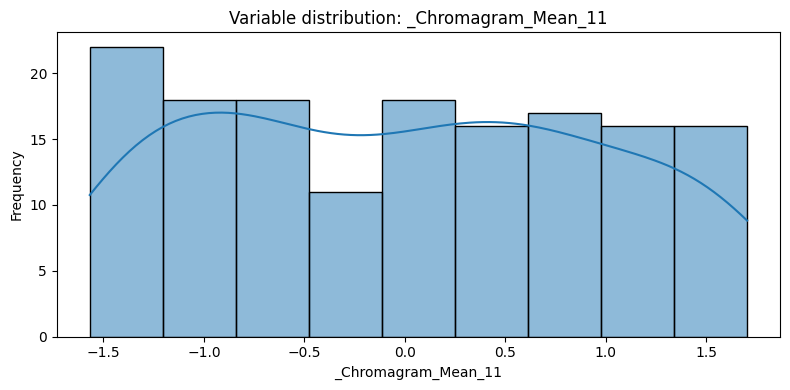

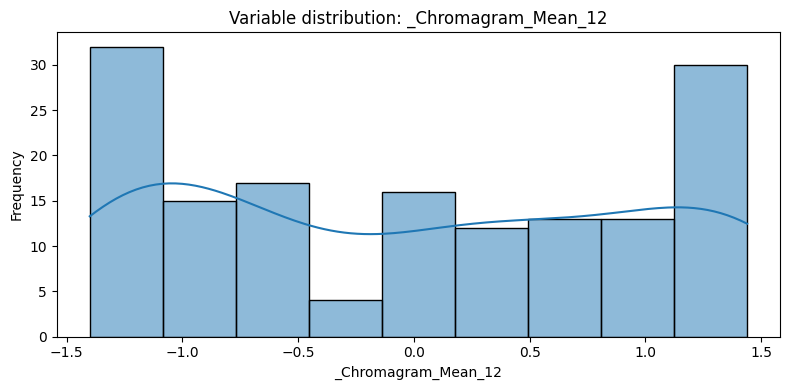

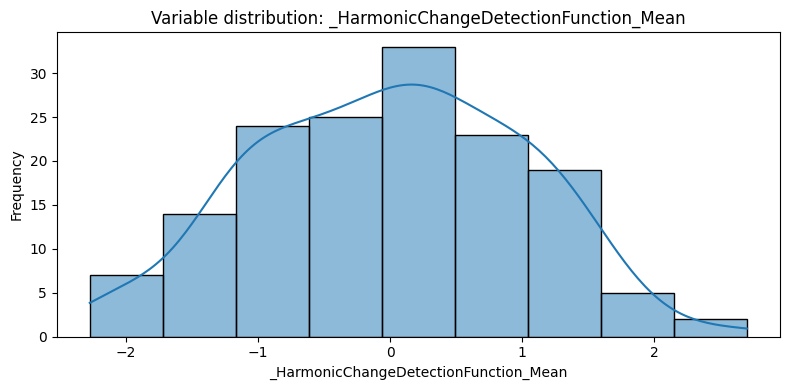

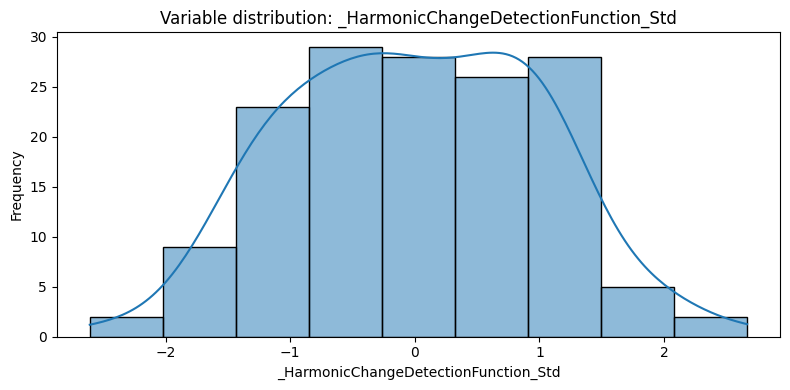

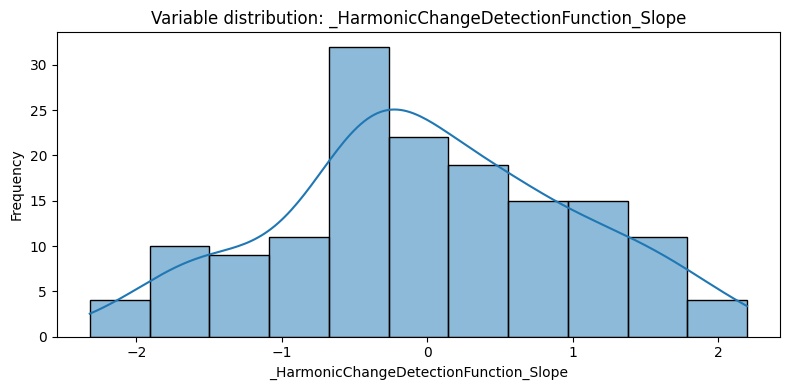

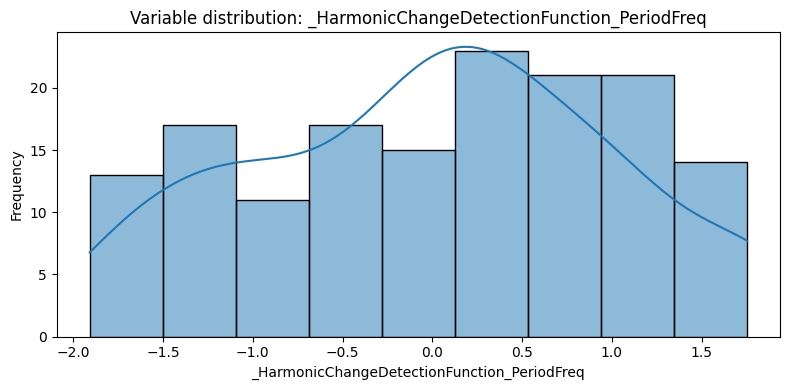

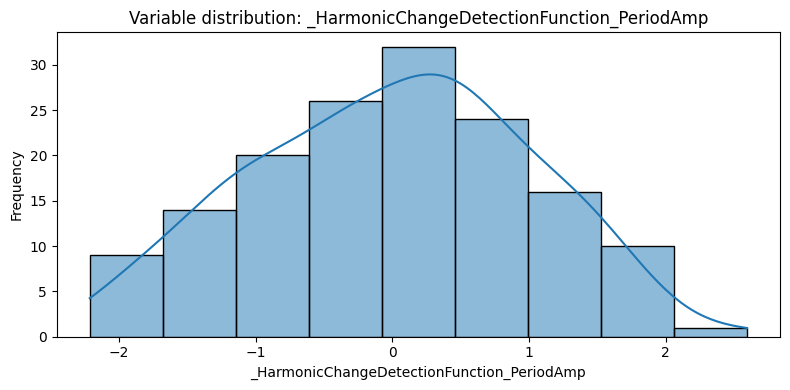

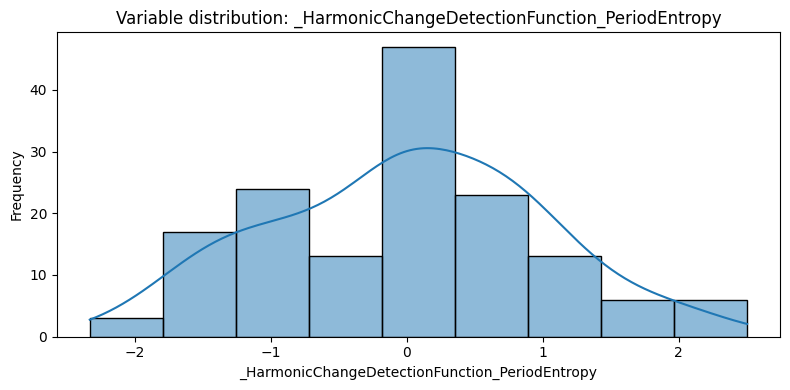

In [123]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Variable distribution: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Dimensionality reduction

In [124]:
pca = PCA()
df_numeric = df[numeric_columns]
pca.fit(df_numeric)
explained_variance = pca.explained_variance_ratio_

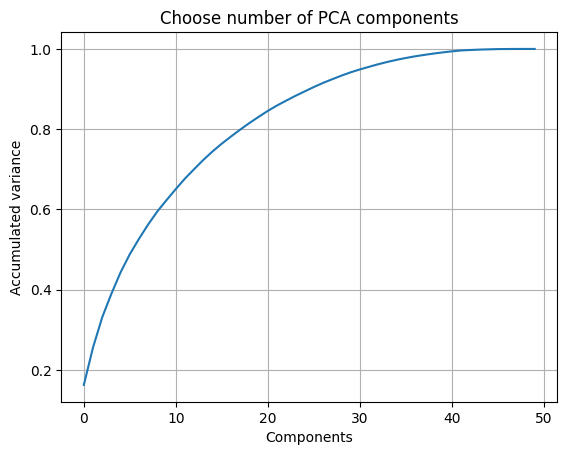

In [125]:
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Components')
plt.ylabel('Accumulated variance')
plt.title('Choose number of PCA components')
plt.grid(True)
plt.show()

## Split dataset

In [128]:
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [131]:
train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)
test_df.to_csv('test.csv', index=False)

In [132]:
files.download('train.csv')
files.download('val.csv')
files.download('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>